# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Classification of Lithology for ROP Prediction in Geothermal Wells</p>

## Table of Contents

**1. Data Ingestion** 

1.1: Assignation of mud weights from the drilling mud reports for Well 58-32.

1.2: Assignation of lithologies from the Mud logging report for Well 58-32.

1.3: Assignation of mud weights from the drilling mud reports for Well 21-31.

1.4: Assignation of lithologies from the Mud logging report for Well 21-31.

1.5: Merge Well Data.

**2. Data Preparation**

2.1: Data Missingness

2.2: Data Type Check and Treatment 

2.3: Duplicate Detection and Treatment

2.4: Cardinality Check and Treatment

2.5: Outlier Treatment

    2.5.1: Univariate Analysis
    
    2.5.2: Bivariate Analysis

**3. Exploratory Data Analysis**

3.1: Visualization of Features Distribution

3.2: Visualization of Features Distribution according to Lithology Type

3.3: Correlation plot (Heatmap) of numerical features

**4. Feature Engineering**

4.1: Feature Split
    
4.2: Feature Preprocessing

    
**5. Model Development**

5.1: Machine Learning Models


**6. Optimization**

    
**7. Evaluation**


In [1]:
# import some relevant libraries to begin exploratory analysis of the dataset
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns 
import pandas as pd
import lasio
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None) #to see all available columns

# 1. Data Ingestion

Data was gotten from two geothermal wells: Well 58-32 (Utah) and Fallon Well 21-31 (California) - (https://gdr.openei.org).

### Well 58-32

In [2]:
# Read drilling data into pandas dataframe
rawdata_drill_58_32 = pd.read_csv('Well_58-32_processed_pason_log.csv')
rawdata_drill_58_32.head()

Depth(ft)  Depth(m)  ROP(1 ft)  ROP(1 m)  weight on bit (k-lbs)  \
0      85.18     25.96      56.80     17.31                    0.0   
1      86.18     26.27      61.14     18.63                    0.0   
2      87.23     26.59      18.58      5.66                    0.0   
3      88.26     26.90      38.29     11.67                    0.0   
4      89.36     27.24     394.38    120.20                    0.0   

   weight on bit (kg)  Temp Out( degF)  Temp Out( degC)  Temp In(degF)  \
0                 0.0            93.49            34.16          90.87   
1                 0.0            93.52            34.18          90.83   
2                 0.0            94.25            34.58          90.91   
3                 0.0            94.44            34.69          91.14   
4                 0.0            94.48            34.71          91.18   

   Temp In(degC)  Pit Total (bbls)  Pit Total (m3)  Pump Press (psi)  \
0          32.71            274.83           43.69            463.72   
1          32.68            274.83           43.69            459.53   
2          32.73            273.80           43.53            454.57   
3          32.86            273.79           43.53            451.14   
4          32.88            273.80           43.53            456.09   

   Pump Press (KPa)  Hookload (k-lbs)  Hookload (kg)  Surface Torque (psi)  \
0           3197.35             31.77       14408.16                  8.93   
1           3168.46             31.01       14063.49                  8.93   
2           3134.26             31.01       14063.49                  9.01   
3           3110.61             31.16       14131.52                  8.97   
4           3144.74             31.54       14303.85                  8.97   

   Surface Torque (KPa)  Rotary Speed (rpm)  Flow In (gal/min)  \
0                 61.57              151.09            1109.58   
1                 61.57              151.09            1108.36   
2                 62.12               61.54            1102.87   
3                 61.85               60.23            1101.04   
4                 61.85               61.75            1102.46   

   Flow In(liters/min)  Flow Out %  WH Pressure (psi)  WH Pressure (KPa)  \
0              4200.22      101.61           -1230.69           -8485.61   
1              4195.60      101.70           -1230.69           -8485.61   
2              4174.82       96.81           -1230.69           -8485.61   
3              4167.89       96.67           -1230.69           -8485.61   
4              4173.26       96.63           -1230.69           -8485.61   

   H2S Floor  H2S Cellar  H2S Pits  
0      -0.01       -0.03      0.31  
1      -0.01       -0.04      0.31  
2      -0.01       -0.03      0.30  
3       0.00       -0.03      0.31  
4      -0.02       -0.02      0.31

In [3]:
rawdata_drill_58_32.columns

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

In [4]:
df_drill_58_32 = rawdata_drill_58_32[['Depth(ft)', 'ROP(1 ft)', 'weight on bit (k-lbs)', 'Pump Press (psi)', 'Surface Torque (psi)',
                                      'Rotary Speed (rpm)', 'Flow In (gal/min)']]
# Rename the features of the new dataframe
df_drill_58_32 = df_drill_58_32.rename(columns={'Depth(ft)': 'DEPTH'})
df_drill_58_32 = df_drill_58_32.rename(columns={'ROP(1 ft)': 'ROP'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Pump Press (psi)': 'Pump_Pressure'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Surface Torque (psi)': 'Torque'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Rotary Speed (rpm)': 'RPM'})
df_drill_58_32 = df_drill_58_32.rename(columns={'Flow In (gal/min)': 'Flow_Rate'})
df_drill_58_32 = df_drill_58_32.rename(columns={'weight on bit (k-lbs)': 'WOB'})
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46

### 1.1: Assignation of mud weights from the drilling mud reports.

The mud weights used for drilling the various sections of the well were gotten from the drilling mud reports and assigned as a function of the well depth.

In [5]:
# create a function to assign mud weight used for different depth range
def mud_weight_58_32(DEPTH):
    if (DEPTH < 342):
        return 8.60
    elif (342 < DEPTH <= 3187):
        return 9.20  
    elif (3187 < DEPTH <= 3281):
        return 9.50  
    elif (3281 < DEPTH <= 4044):
        return 9.40 
    elif (4044 < DEPTH <= 4630):
        return 9.0   
    elif (4630 < DEPTH <= 4875):
        return 9.3    
    elif (4875 < DEPTH <= 6177):
        return 9.0  
    elif (6177 < DEPTH <= 7200):
        return 8.40
    elif (7200 < DEPTH <= 7440):
        return 8.50
    elif (7440 < DEPTH <= 7536.25):
        return 8.60
    else:
        return np.nan

In [6]:
# Add the mud weights to the data
df_drill_58_32['MW'] = df_drill_58_32['DEPTH'].apply(mud_weight_58_32)
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58  8.6
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36  8.6
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87  8.6
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04  8.6
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46  8.6

### 1.2: Assignation of lithologies from the Mud logging report for Well 58-32.

The lithologies encountered while drilling the wells were gottten from the Mud logging report and assigned as a function of the well depth.

In [7]:
# create a function to assign lithology for corresponding depth range
def lithology_58_32(DEPTH):
    if (DEPTH <= 3250):
        return 'Alluvium'
    elif (3250 < DEPTH <= 5250):
        return 'Rhyolite' 
    elif (5250 < DEPTH <= 7536.25):
        return 'Plutonic' 
    else:
        return np.nan

In [8]:
# Add the lithologies to the data
df_drill_58_32['Lithology'] = df_drill_58_32['DEPTH'].apply(lithology_58_32)
df_drill_58_32.head()

DEPTH     ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW Lithology
0  85.18   56.80  0.0         463.72    8.93  151.09    1109.58  8.6  Alluvium
1  86.18   61.14  0.0         459.53    8.93  151.09    1108.36  8.6  Alluvium
2  87.23   18.58  0.0         454.57    9.01   61.54    1102.87  8.6  Alluvium
3  88.26   38.29  0.0         451.14    8.97   60.23    1101.04  8.6  Alluvium
4  89.36  394.38  0.0         456.09    8.97   61.75    1102.46  8.6  Alluvium

# 2. Data Preparation

In [9]:
# Import drilling data for analysis
rawdata = df_drill_58_32.copy()
rawdata.head(2)

DEPTH    ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW Lithology
0  85.18  56.80  0.0         463.72    8.93  151.09    1109.58  8.6  Alluvium
1  86.18  61.14  0.0         459.53    8.93  151.09    1108.36  8.6  Alluvium

### 2.1: Data Missingness

<Axes: >

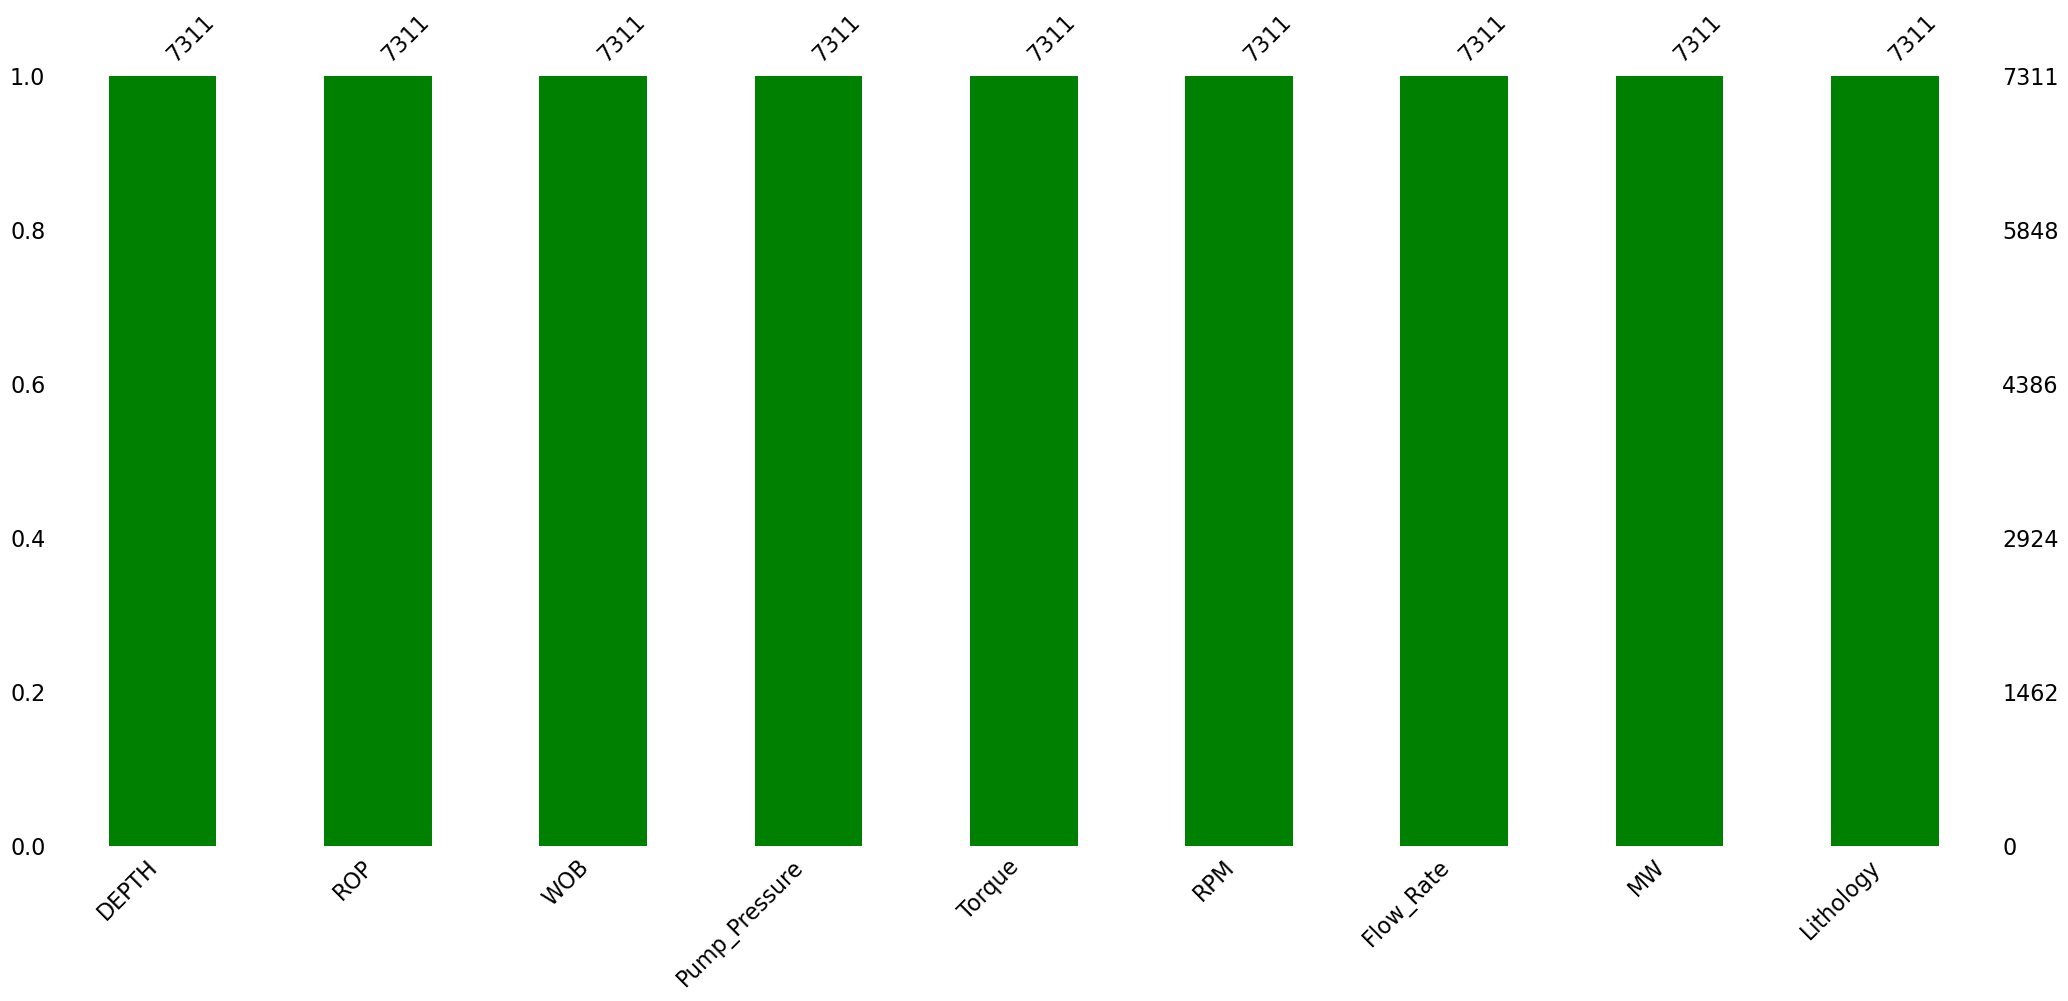

In [10]:
import missingno as msno 

# Determine the fraction of missingness
rawdata.isna().sum()
msno.bar(rawdata, color="green")

### 2.2: Data Type Check and Treatment 

In [11]:
# Check the data types of each column
print("Data types of each column:")
rawdata.dtypes

Data types of each column:


DEPTH            float64
ROP              float64
WOB              float64
Pump_Pressure    float64
Torque           float64
RPM              float64
Flow_Rate        float64
MW               float64
Lithology         object
dtype: object

### 2.3: Duplicate Detection and Treatment

In [12]:
# Check for duplicate rows based on all columns
duplicates = rawdata.duplicated(keep=False)  # keep=False marks all duplicates as True
duplicate_rows = rawdata[duplicates]

# Print the result
if duplicate_rows.empty:
    print("No duplicate rows based on all columns.")
else:
    print("Duplicate rows based on all columns:")
    display(duplicate_rows)

Duplicate rows based on all columns:


DEPTH     ROP    WOB  Pump_Pressure  Torque    RPM  Flow_Rate   MW  \
1002  1131.20  126.81   7.81         523.58  131.28  93.89     764.01  9.2   
1003  1131.20  126.81   7.81         523.58  131.28  93.89     764.01  9.2   
1240  1374.46   77.75  18.77         549.88  134.40  86.50     839.18  9.2   
1241  1374.46   77.75  18.77         549.88  134.40  86.50     839.18  9.2   
1378  1514.55   22.20  16.09         610.50  142.29  82.96     845.57  9.2   
1379  1514.55   22.20  16.09         610.50  142.29  82.96     845.57  9.2   
1767  1909.54   34.22  15.93         638.71  122.28  71.31     842.02  9.2   
1768  1909.54   34.22  15.93         638.71  122.28  71.31     842.02  9.2   
1855  1998.67   23.59  25.54         653.96  118.01  90.20     832.20  9.2   
1856  1998.67   23.59  25.54         653.96  118.01  90.20     832.20  9.2   
2698  2871.45   41.65  20.12        1519.47  146.34  52.73     692.04  9.2   
2699  2871.45   41.65  20.12        1519.47  146.34  52.73     692.04  9.2   
2714  2886.90   49.37  27.10        1584.19  153.58  46.47     688.77  9.2   
2715  2886.90   49.37  27.10        1584.19  153.58  46.47     688.77  9.2   
3181  3371.32   35.70  21.86        1735.39  136.65  39.88     726.08  9.4   
3182  3371.32   35.70  21.86        1735.39  136.65  39.88     726.08  9.4   
3416  3612.03   10.52  23.31        1751.07  157.28  56.21     725.23  9.4   
3417  3612.03   10.52  23.31        1751.07  157.28  56.21     725.23  9.4   
4181  4392.00   14.78  25.04        1769.24  244.58  58.86     731.82  9.0   
4182  4392.00   14.78  25.04        1769.24  244.58  58.86     731.82  9.0   
4267  4477.88   14.76  24.49        1729.19  233.72  58.68     724.57  9.0   
4268  4477.88   14.76  24.49        1729.19  233.72  58.68     724.57  9.0   
4355  4565.88    9.29  23.87        1762.52  136.39  49.16     723.06  9.0   
4356  4565.88    9.29  23.87        1762.52  136.39  49.16     723.06  9.0   
4387  4597.20    6.70  23.62        1804.95  138.63  38.18     742.67  9.0   
4388  4597.20    6.70  23.62        1804.95  138.63  38.18     742.67  9.0   
4436  4645.66   10.42  10.55        2015.57  152.13  52.70     714.44  9.3   
4437  4645.66   10.42  10.55        2015.57  152.13  52.70     714.44  9.3   
4438  4646.67   11.68   9.57        1801.16  161.01  50.41     726.08  9.3   
4439  4646.67   11.68   9.57        1801.16  161.01  50.41     726.08  9.3   
4471  4679.03   12.15  15.67        1667.06  163.76  29.97     714.81  9.3   
4472  4679.03   12.15  15.67        1667.06  163.76  29.97     714.81  9.3   
4648  4857.27    6.20  31.51        1449.63   18.50   0.00     602.14  9.3   
4649  4857.27    6.20  31.51        1449.63   18.50   0.00     602.14  9.3   
4696  4904.76    7.62  14.01        1697.37  183.77  62.86     667.24  9.0   
4697  4904.76    7.62  14.01        1697.37  183.77  62.86     667.24  9.0   
4733  4941.21    9.36  36.02        1630.70   20.37   0.00     601.28  9.0   
4734  4941.21    9.36  36.02        1630.70   20.37   0.00     601.28  9.0   
4825  5033.34   12.37  24.74        1405.68   21.82   0.00     598.91  9.0   
4826  5033.34   12.37  24.74        1405.68   21.82   0.00     598.91  9.0   
4900  5107.85    7.43  25.46        1676.15  130.44  32.99     625.21  9.0   
4901  5107.85    7.43  25.46        1676.15  130.44  32.99     625.21  9.0   
5015  5222.99    7.85  32.96        1640.55  145.95  32.65     614.86  9.0   
5016  5222.99    7.85  32.96        1640.55  145.95  32.65     614.86  9.0   
5038  5245.20    8.43  18.56        1353.41   99.98  37.02     615.94  9.0   
5039  5245.20    8.43  18.56        1353.41   99.98  37.02     615.94  9.0   
5318  5526.43   10.38  25.38        1235.98  165.82  77.44     647.40  9.0   
5319  5526.43   10.38  25.38        1235.98  165.82  77.44     647.40  9.0   
5404  5612.90   10.43  28.98        1323.10  143.63  90.30     652.15  9.0   
5405  5612.90   10.43  28.98        1323.10  143.63  90.30     652.15  9.0   
5580  5790.34   10.91  35.42  

In [13]:
# Remove duplicate rows
rawdata = rawdata.drop_duplicates()

# Verify that duplicates are removed
duplicates_after_cleaning = rawdata.duplicated(keep=False)
if not duplicates_after_cleaning.any():
    print("All duplicates have been removed.")
else:
    print("There are still duplicates present.")
    display(rawdata_cleaned[duplicates_after_cleaning])


All duplicates have been removed.


### 2.4: Cardinality Check and Treatment

In [14]:
# Define a function named `cardinality` that takes a DataFrame `df` as input
def cardinality(df):
    # Initialize an empty dictionary to store the cardinality (number of unique values) for each column
    cardinality = {}
    
    # Get the list of columns in the DataFrame
    cols = df.columns
    
    # Iterate over each column in the DataFrame
    for col in cols:
        # Calculate the number of unique values in the column and store it in the dictionary
        # Use the column from the input DataFrame `df`, not from `rawdata`
        cardinality[col] = len(df[col].unique())
    
    # Return the dictionary containing the cardinality of each column
    return cardinality

# Call the function `cardinality` with `rawdata` DataFrame and display the result
cardinality(rawdata)

{'DEPTH': 7280,
 'ROP': 3379,
 'WOB': 2372,
 'Pump_Pressure': 3347,
 'Torque': 2971,
 'RPM': 3041,
 'Flow_Rate': 3321,
 'MW': 8,
 'Lithology': 3}

### 2.5: Outlier Treatment 

Possible outliers present could be related to measurement errors from the logging sensors or sensor malfunctioning

In [15]:
# Data description
rawdata.describe()

DEPTH          ROP          WOB  Pump_Pressure       Torque  \
count  7281.000000  7281.000000  7281.000000    7281.000000  7281.000000   
mean   3832.691538    42.094192    23.116807    1265.942107   130.951864   
std    2149.105994    76.049421     9.126359     490.737615    48.692743   
min      85.180000     0.000000     0.000000      19.940000     0.000000   
25%    1966.840000    11.420000    18.310000     665.020000   116.870000   
50%    3845.820000    18.000000    23.820000    1431.960000   140.310000   
75%    5694.110000    44.490000    29.680000    1669.340000   157.280000   
max    7536.250000  2977.910000    47.050000    2200.430000   273.710000   

               RPM    Flow_Rate           MW  
count  7281.000000  7281.000000  7281.000000  
mean     54.970271   716.360299     9.015231  
std      25.948809   141.978333     0.321078  
min       0.000000     0.000000     8.400000  
25%      38.110000   620.260000     9.000000  
50%      50.380000   700.210000     9.200000  
75%      76.010000   824.900000     9.200000  
max     271.580000  3317.510000     9.500000

### 2.5.1: Univariate Analysis

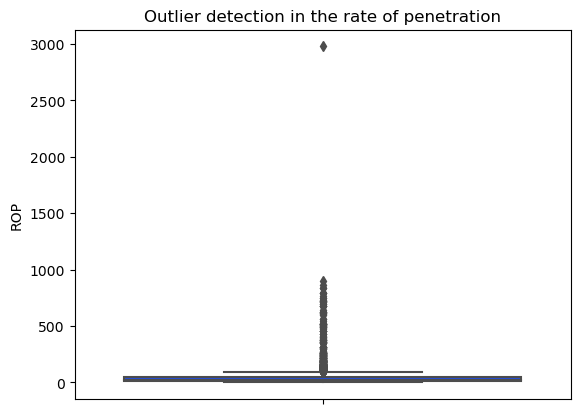

In [16]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['ROP'], palette = "bright")
plt.title('Outlier detection in the rate of penetration')
plt.show()

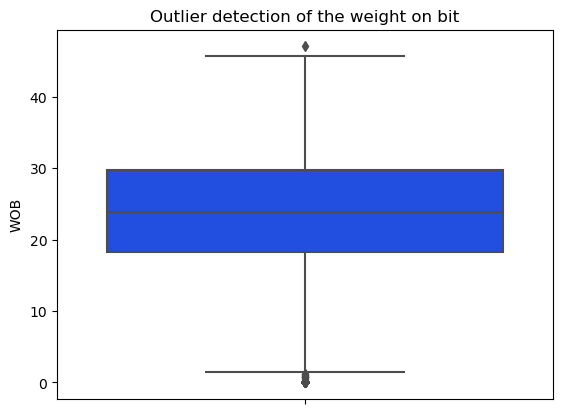

In [17]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['WOB'], palette = "bright")
plt.title('Outlier detection of the weight on bit')
plt.show()

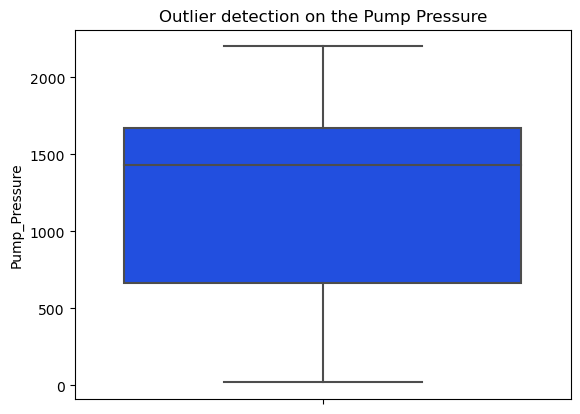

In [18]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Pump_Pressure'], palette = "bright")
plt.title('Outlier detection on the Pump Pressure')
plt.show()

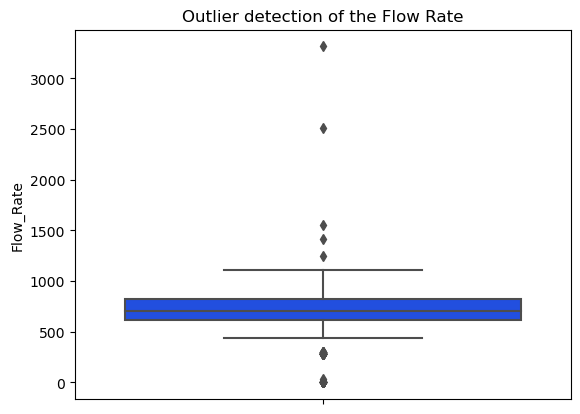

In [19]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Flow_Rate'], palette = "bright")
plt.title('Outlier detection of the Flow Rate')
plt.show()

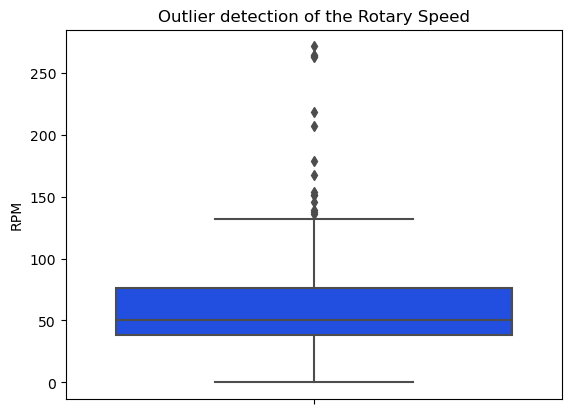

In [20]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['RPM'], palette = "bright")
plt.title('Outlier detection of the Rotary Speed')
plt.show()

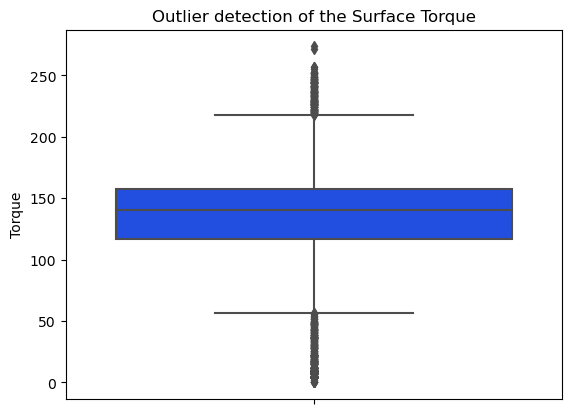

In [21]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Torque'], palette = "bright")
plt.title('Outlier detection of the Surface Torque')
plt.show()

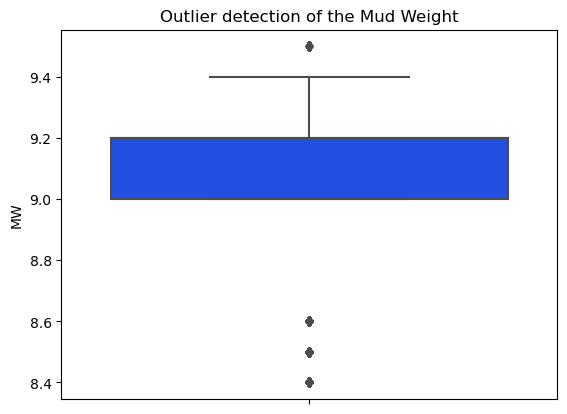

In [22]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['MW'], palette = "bright")
plt.title('Outlier detection of the Mud Weight')
plt.show()

### 2.5.2: Bivariate Analysis

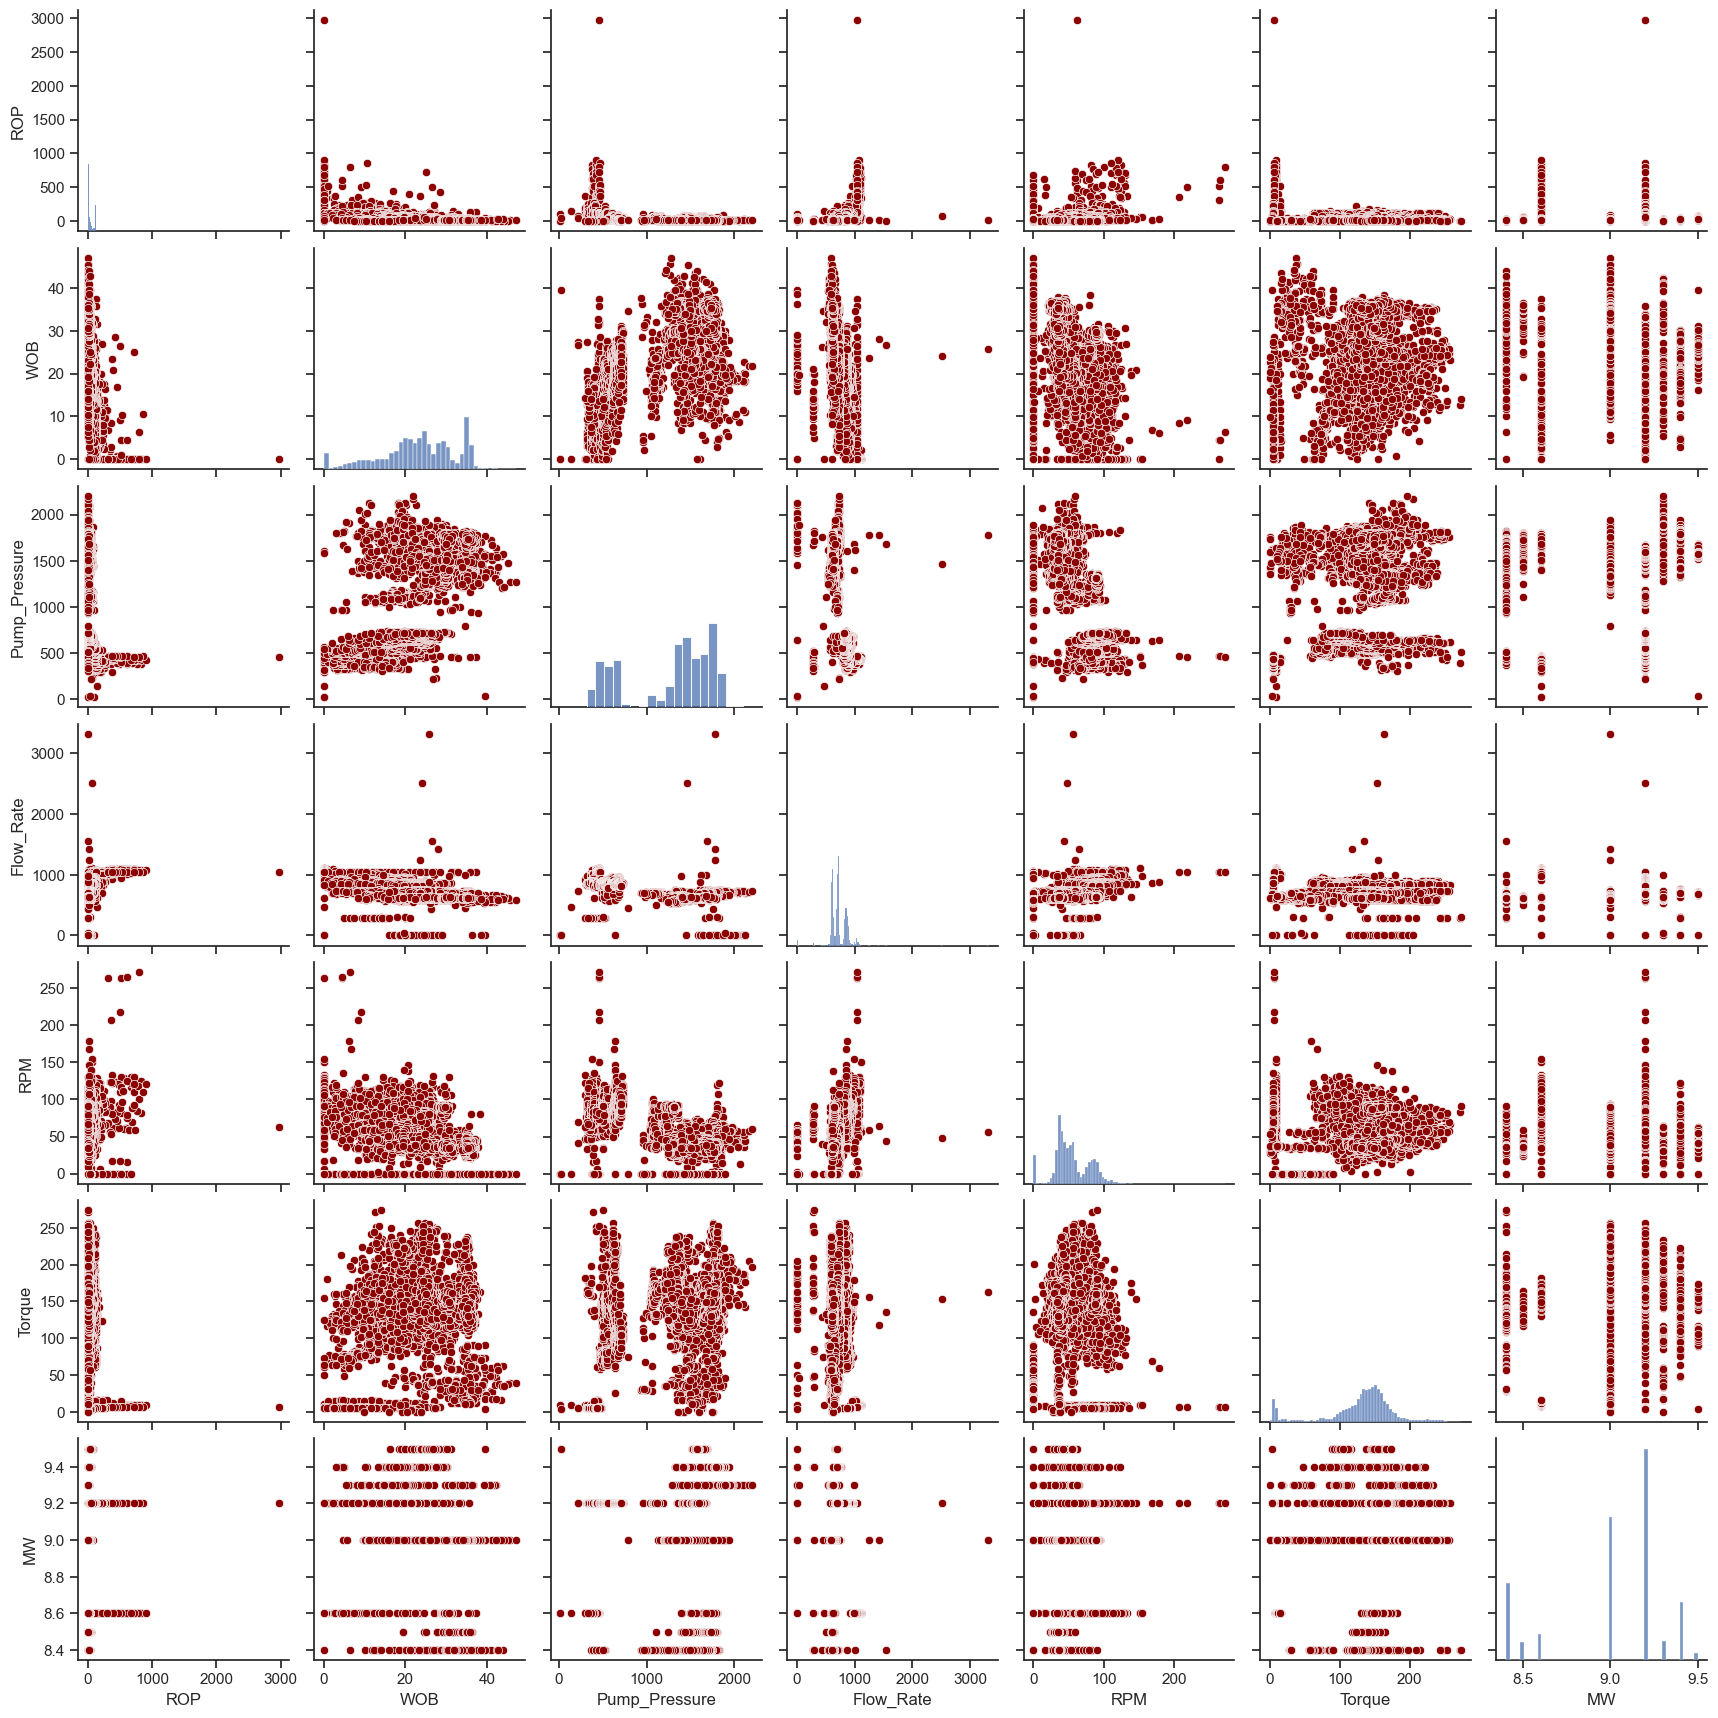

In [23]:
# Set the background style
sns.set(style='ticks')

# Create the pair plot and set the color for scatter plots to deep red
g = sns.pairplot(rawdata, y_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW'],
                 x_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW'],
                 plot_kws={'color': '#8B0000'})  # Using deep red color

# Show the plot
plt.show()

In [24]:
# Capping the observed outliers
rawdata = rawdata[rawdata['ROP'] < 150]
rawdata = rawdata[rawdata['ROP'] > 0]
rawdata = rawdata[rawdata['WOB'] > 0]
rawdata = rawdata[rawdata['Pump_Pressure'] > 0]
rawdata = rawdata[rawdata['Flow_Rate'] < 1100]
rawdata = rawdata[rawdata['Flow_Rate'] > 400]
rawdata = rawdata[rawdata['RPM'] < 150]
rawdata = rawdata[rawdata['RPM'] > 0]
rawdata = rawdata[rawdata['Torque'] > 50]
rawdata = rawdata[rawdata['Torque'] < 230]

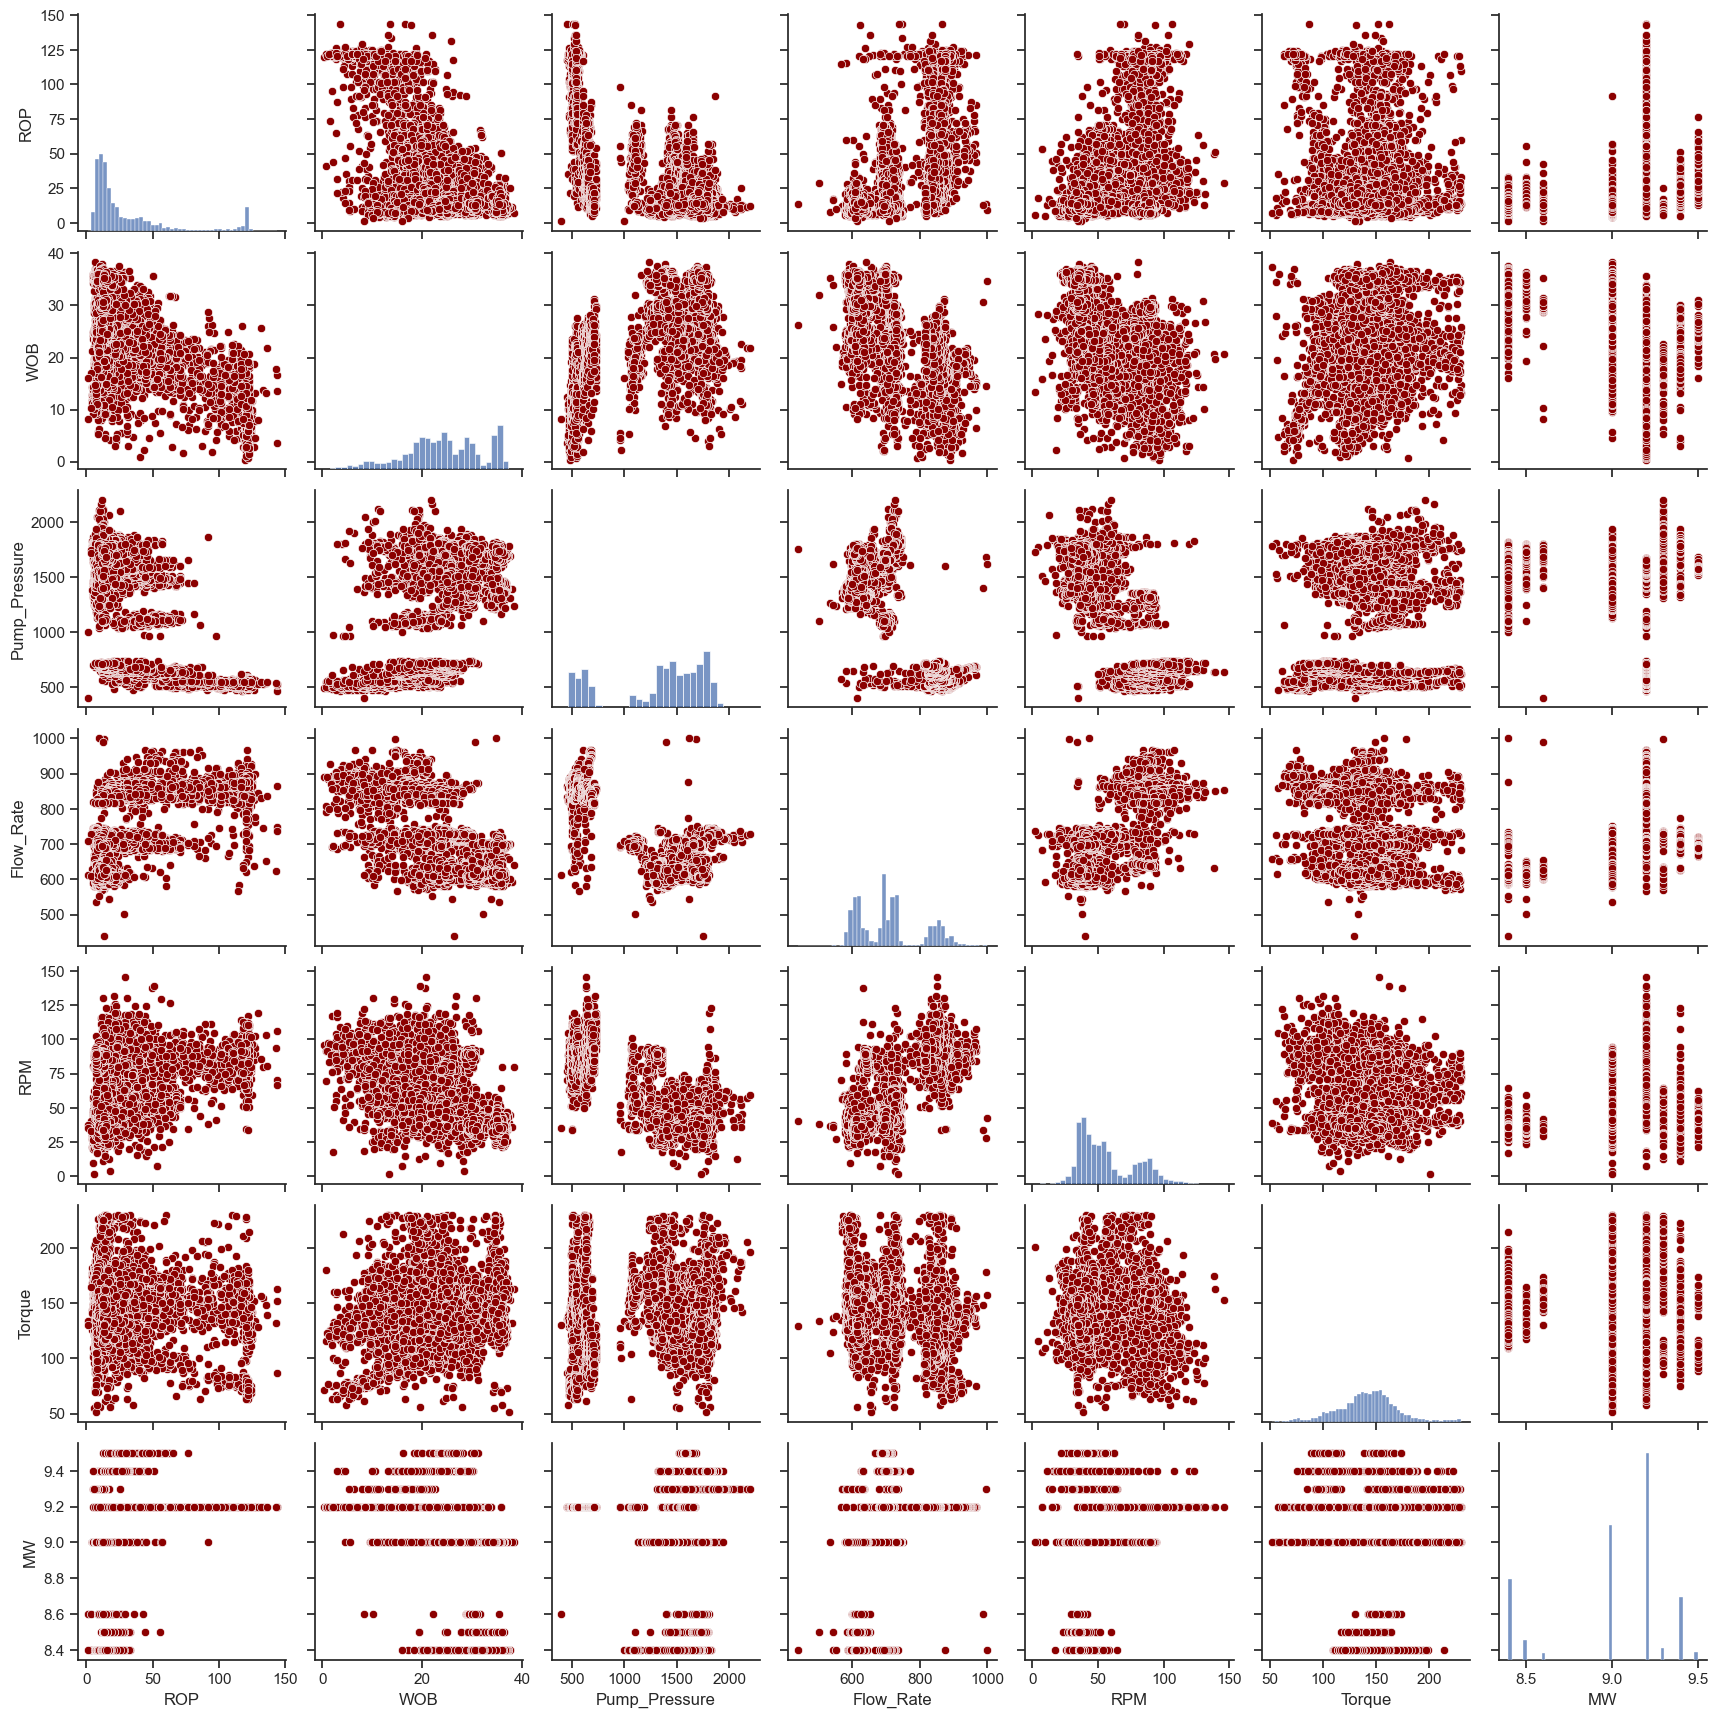

In [25]:
# Set the background style
sns.set(style='ticks')

# Create the pair plot and set the color for scatter plots to deep red
g = sns.pairplot(rawdata, y_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW'],
                 x_vars=['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate', 'RPM', 'Torque', 'MW'],
                 plot_kws={'color': '#8B0000'})  # Using deep red color

# Show the plot
plt.show()

**Inferences**

From the above analysis, the following inferences were obtained.
* Outliers were identified in the ROP features and were capped at max of 150 ft/hr and min greater than 0 ft/hr
* Negative values were identified in weight on bit, and was capped at min of 0 klbs
* Outliers were identified in the flow rate feature and was capped at max of 1100 gpm and min of 400 gpm
* Outliers were identified in the RPM feature and was capped at max  150 RPM and min greater than 0 RPM
* It appears that there seems to be outliers in the MW feature, however from domain knowledge, they are not outliers., rather they represent actual values used in the field.

In [26]:
rawdata.describe()

DEPTH          ROP          WOB  Pump_Pressure       Torque  \
count  6280.000000  6280.000000  6280.000000    6280.000000  6280.000000   
mean   4021.278639    31.957384    24.012602    1317.433495   142.321586   
std    2034.903546    32.113614     7.872566     449.873070    27.525547   
min     594.560000     1.000000     0.400000     400.090000    51.440000   
25%    2247.250000    11.560000    19.290000    1074.975000   126.510000   
50%    3906.520000    17.600000    24.155000    1445.455000   143.360000   
75%    5857.252500    39.530000    29.730000    1682.580000   158.080000   
max    7536.250000   143.580000    38.320000    2200.430000   229.980000   

               RPM    Flow_Rate           MW  
count  6280.000000  6280.000000  6280.000000  
mean     56.400925   710.399202     9.024252  
std      21.661465    93.808359     0.325107  
min       1.690000   440.000000     8.400000  
25%      38.990000   620.687500     9.000000  
50%      50.380000   698.380000     9.200000  
75%      75.452500   735.780000     9.200000  
max     146.030000   999.910000     9.500000

# 3. Exploratory Data Analysis

In [27]:
# create a copy of cleaned data
df_explore = rawdata.copy()

### 3.1: Visualization of Features Distribution

Text(0.5, 1.0, 'ROP Distribution')

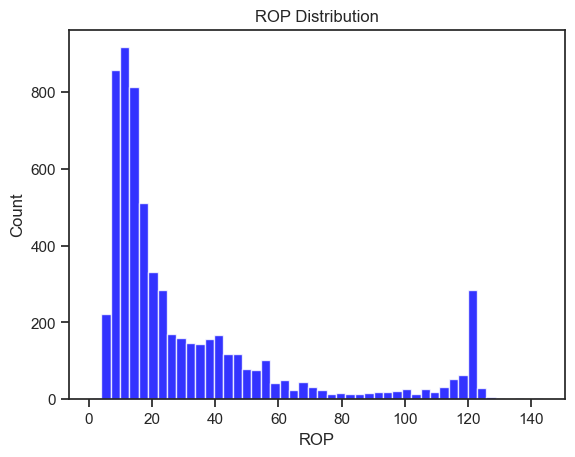

In [28]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(rawdata['ROP'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('ROP Distribution')

Text(0.5, 1.0, 'WOB Distribution')

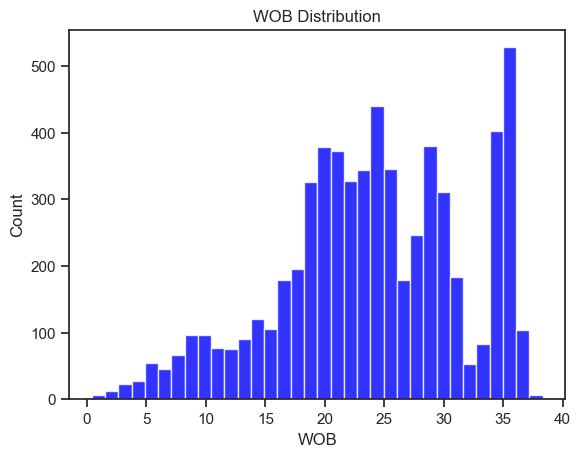

In [29]:
# Visualize the distribution of the Weight on Bit (WOB)
sns.distplot(rawdata['WOB'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('WOB Distribution')

Text(0.5, 1.0, 'Pump Pressure Distribution')

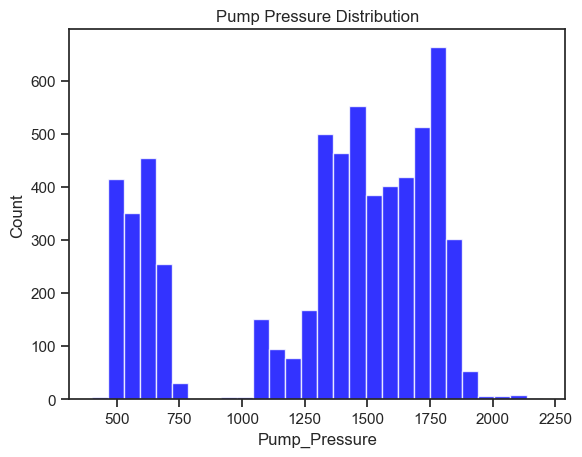

In [30]:
# Visualize the distribution of Pump Pressure
sns.distplot(rawdata['Pump_Pressure'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Pump Pressure Distribution')

Text(0.5, 1.0, 'Flow Rate Distribution')

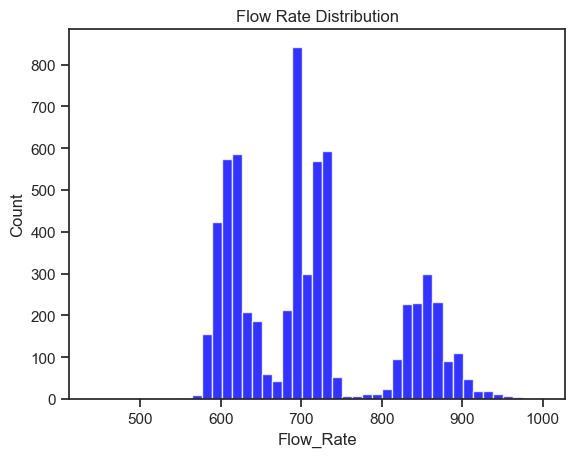

In [31]:
# Visualize the distribution of the Flow Rate
sns.distplot(rawdata['Flow_Rate'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Flow Rate Distribution')

Text(0.5, 1.0, 'Rotary Speed Distribution')

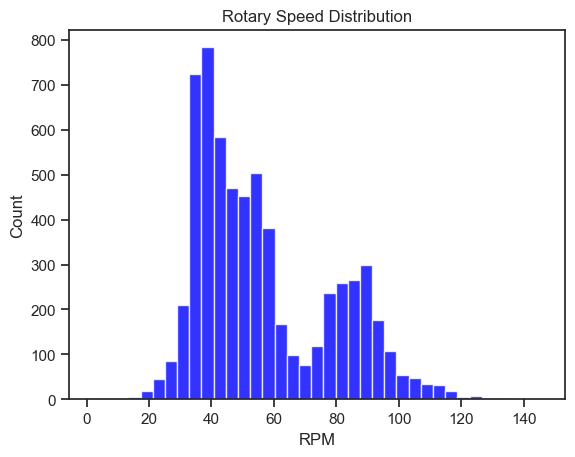

In [32]:
# Visualize the distribution of the Rotary Speed (RPM)
sns.distplot(rawdata['RPM'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Rotary Speed Distribution')

Text(0.5, 1.0, 'Torque Distribution')

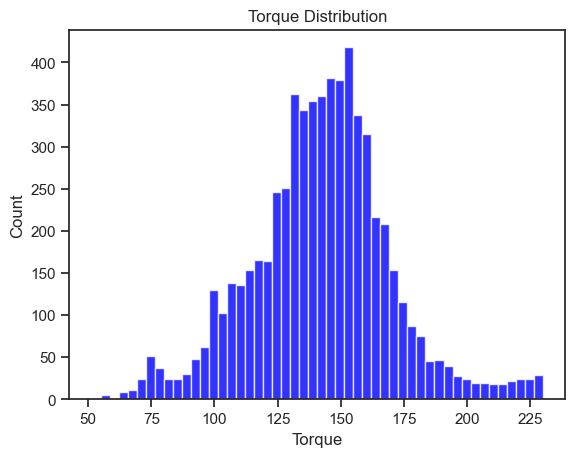

In [33]:
# Visualize the distribution of Torque
sns.distplot(rawdata['Torque'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Torque Distribution')

Text(0.5, 1.0, 'Mud Weight Distribution')

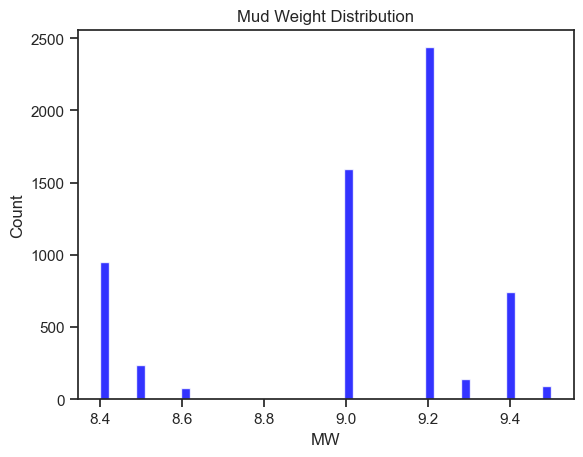

In [34]:
# Visualize the distribution of Mud Weight
sns.distplot(rawdata['MW'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Mud Weight Distribution')

In [35]:
rawdata.head(2)

DEPTH     ROP   WOB  Pump_Pressure  Torque    RPM  Flow_Rate   MW  \
481  594.56  143.58  3.52         456.09   86.86  70.00     865.37  9.2   
482  595.58  122.15  2.02         477.44   74.93  96.27     884.45  9.2   

    Lithology  
481  Alluvium  
482  Alluvium

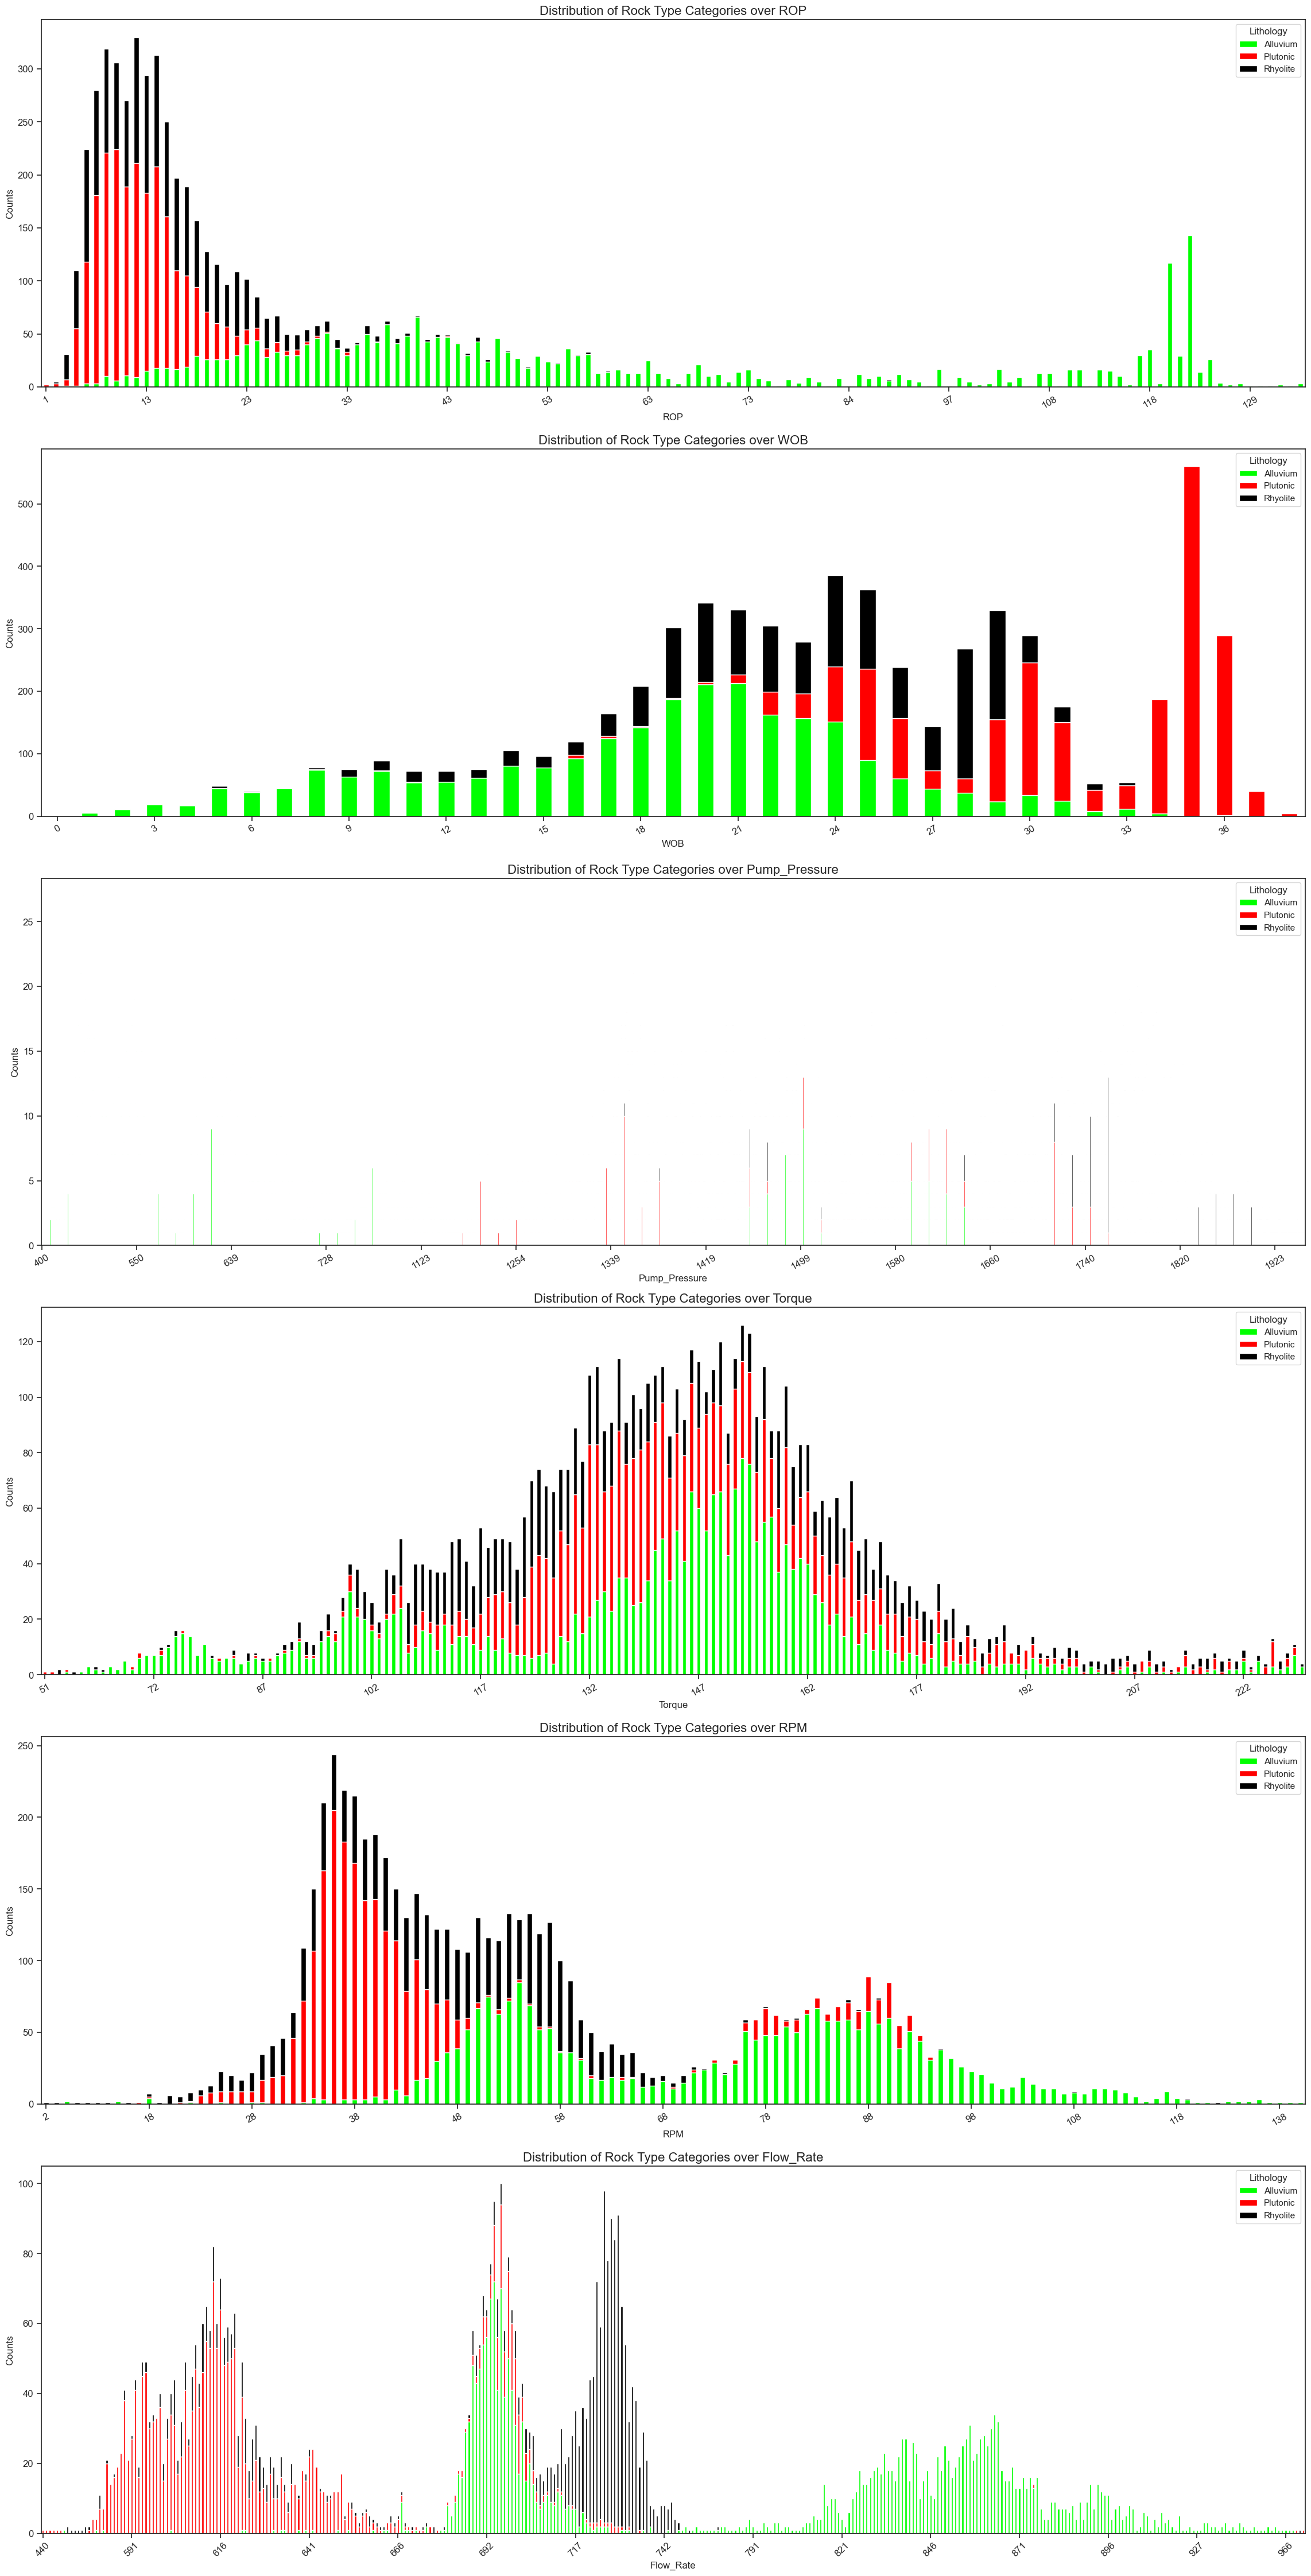

In [36]:
# Function to group data, reset index, and pivot for easier plotting
def prepare_data(df_explore, index_col, category_col='Lithology'):
    # Group the data by category and index columns, count the occurrences, reset the index, and pivot the table
    grouped = df_explore.groupby([category_col, index_col]).size().reset_index().pivot(
        columns=category_col, index=index_col, values=0)
    return grouped

# Create a copy of the DataFrame for manipulation
df_ = df_explore.copy()

# Define the category column that should not be changed
category_column = 'Lithology'

# Find columns to convert (all except the category column)
columns_to_convert = df_.columns[df_.columns != category_column]

# Convert and round these columns to integers
df_[columns_to_convert] = df_[columns_to_convert].apply(lambda x: np.round(x).astype(int))

# Prepare data for each feature by calling the prepare_data function
explore1 = prepare_data(df_, 'ROP')
explore2 = prepare_data(df_, 'WOB')
explore3 = prepare_data(df_, 'Pump_Pressure')
explore4 = prepare_data(df_, 'Torque')
explore5 = prepare_data(df_, 'RPM')
explore6 = prepare_data(df_, 'Flow_Rate')

# Setup the plot with 6 subplots in a single column
fig, axes = plt.subplots(6, 1, figsize=(23, 45))

# Define color mapping for the bar plots
colors = ['#00FF00', '#FF0000', '#000000']  # Green, Red, Black

# List of prepared data for each feature
explorations = [explore1, explore2, explore3, explore4, explore5, explore6]

# Plot each feature
for i, explore in enumerate(explorations):
    # Plot the grouped data as stacked bar plots
    explore.plot(kind='bar', stacked=True, color=colors, ax=axes[i])
    
    # Set the title, x-label, and y-label for each subplot
    axes[i].set_title('Distribution of Rock Type Categories over ' + explore.index.name, fontsize=16)
    axes[i].set_xlabel(explore.index.name, fontsize=12)
    axes[i].set_ylabel('Counts', fontsize=12)
    
    # Set tick parameters for x and y axis
    axes[i].tick_params(axis='x', labelsize=12, labelrotation=30)  # Rotate x-axis labels to the right
    axes[i].tick_params(axis='y', labelsize=12)
    
    # Set x-axis major tick locator to limit the number of ticks
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(15))

# Adjust layout to fit subplots into the figure area neatly
plt.tight_layout()

# Rotate x-axis labels for all subplots
plt.xticks(rotation=45)

# Show the plot
plt.show()


### 3.2: Visualization of Features Distribution according to Lithology Type

In [37]:
# group by the Lithology Hardness Type and determine the mean of each feature
df_p11 = rawdata.groupby(['Lithology']).mean()
df_p11 = df_p11.reset_index()
df_p11.head()

Lithology        DEPTH        ROP        WOB  Pump_Pressure      Torque  \
0  Alluvium  1912.312984  59.228008  18.301048     919.934156  139.728080   
1  Plutonic  6402.259924  12.603371  31.417179    1472.360389  145.856733   
2  Rhyolite  4175.440854  15.579241  23.226965    1716.162473  141.747360   

         RPM   Flow_Rate        MW  
0  73.809660  789.472916  9.207440  
1  43.246576  623.813599  8.657360  
2  46.951237  701.238507  9.212246

Text(0.5, 1.0, 'Averge ROP according to Lithology')

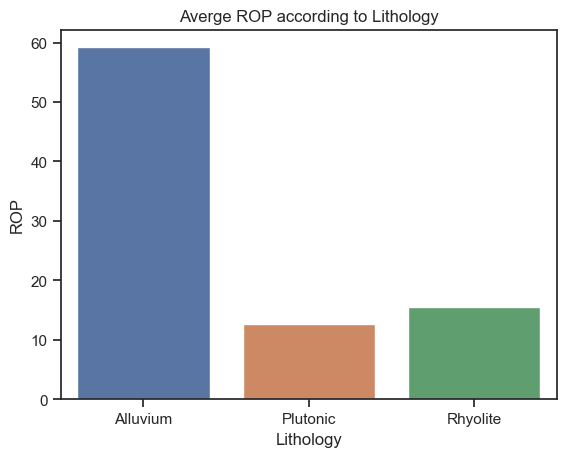

In [38]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["ROP"])
plt.title('Averge ROP according to Lithology')

From the above plot, the rate of penetration is averagely 46 for the hard formation type and averagely 108 for the medium formation. This is logical as drilling rate increases in softer formations when other controllable driling parameters are kept constant.

Text(0.5, 1.0, 'Averge Torque according to Lithology')

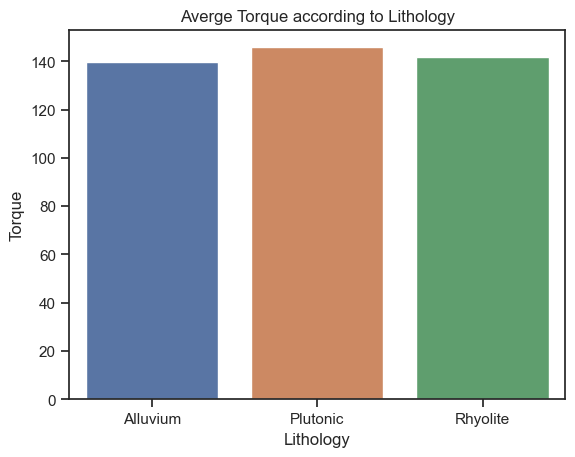

In [39]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["Torque"])
plt.title('Averge Torque according to Lithology')

From the above plot, there are higher torque values for the hard formation and relatively lower values for the soft formation. It is a normal drilling phenomenon to experience higher torque values in hard formations because of the high resistance caused by hard rocks on the drill string.

Text(0.5, 1.0, 'Averge Rotary Speed according to Lithology')

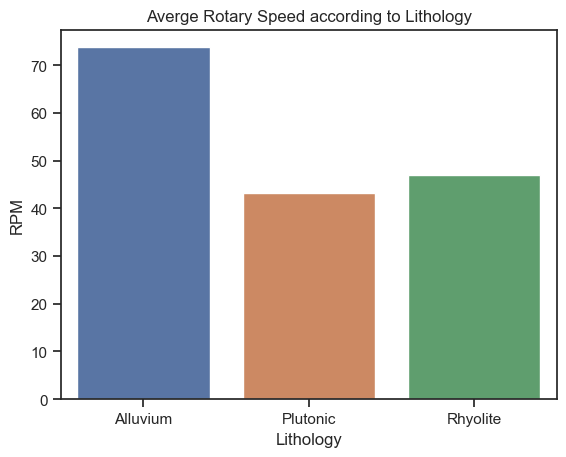

In [40]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["RPM"])
plt.title('Averge Rotary Speed according to Lithology')

Text(0.5, 1.0, 'Averge Pump Pressure according to Lithology')

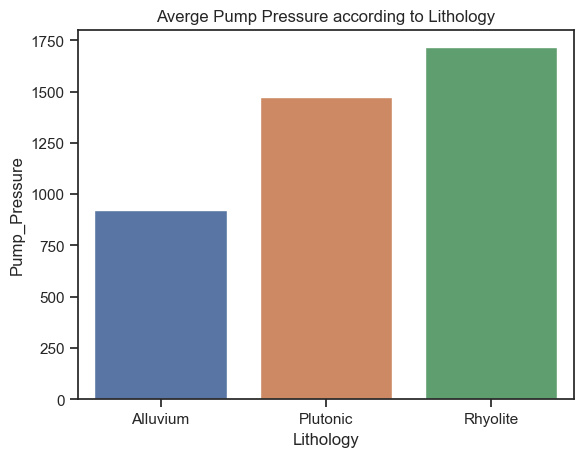

In [41]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["Pump_Pressure"])
plt.title('Averge Pump Pressure according to Lithology')

While drilling through hard formations, Pump pressure are increased to help drill bits cutting ability by cracking the formation through high jetting force

Text(0.5, 1.0, 'Averge Flow Rate according to Lithology')

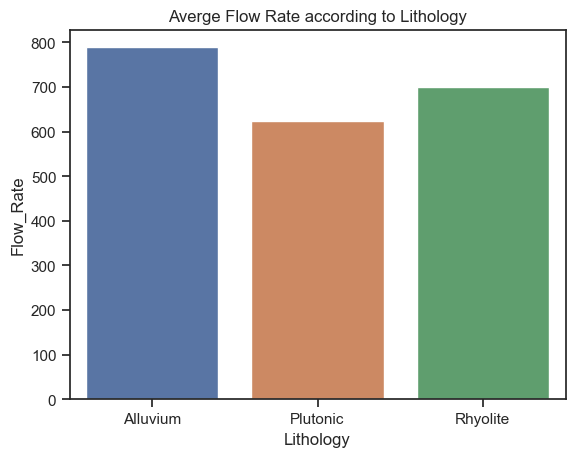

In [42]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["Flow_Rate"])
plt.title('Averge Flow Rate according to Lithology')

Due to the high rate of penetration in medium formations, more cuttings will be generated. Higher flowrate are needed to ennsure the efficient removal of the cuttings from the wellbore to prevent stuck pipe, wellbore instability, increased torque and drag, and reduced drilling efficiency.

### 3.3: Correlation plot (Heatmap) of numerical features

Text(0.5, 1.0, 'Correlation map of Numerical Variables')

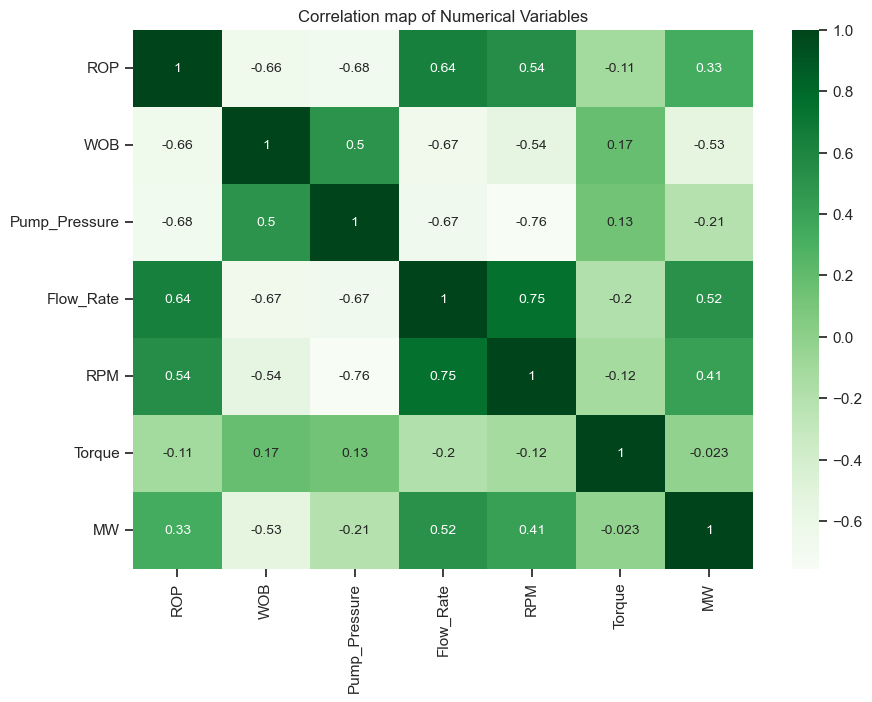

In [43]:
df_feature_num = df_explore[['ROP', 'WOB', 'Pump_Pressure', 'Flow_Rate','RPM', 'Torque', 'MW']]
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = df_feature_num.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Greens')
plt.title('Correlation map of Numerical Variables')

# 4. Feature Engineering

### 4.1: Feature Split

In [44]:
# Drop the column "DEPTH" from the DataFrame df_explore
df_explore = df_explore.drop(columns=['DEPTH'])

In [45]:
df_explore.Lithology.value_counts()

Lithology
Alluvium    2500
Plutonic    2106
Rhyolite    1674
Name: count, dtype: int64

In [46]:
X = df_explore.drop(columns=['Lithology', 'ROP'])
y = df_explore[['Lithology']]

In [47]:
# Define the mapping function
# This dictionary maps lithology types to numerical values
Lithology_mapping = {
    'Alluvium': 0,  # 'Alluvium' is mapped to 0
    'Plutonic': 1,  # 'Plutonic' is mapped to 1
    'Rhyolite': 2   # 'Rhyolite' is mapped to 2
}

# Apply the mapping
# The 'Lithology' column in the DataFrame 'y' is transformed using the defined mapping
# The map function replaces each lithology type with its corresponding numerical value
y['Lithology'] = y['Lithology'].map(Lithology_mapping)

In [48]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
# X: Features, y: Target variable
# test_size=0.20: 20% of the data will be used for validation, 80% for training
# random_state=42: Ensures reproducibility of the split
# stratify=y: Ensures the target variable 'y' is evenly distributed in both train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print the shape of the training features and the value counts of the training target
print(X_train.shape, y_train.value_counts())
print()

# Print the shape of the validation features and the value counts of the validation target
print(X_valid.shape, y_valid.value_counts())

(5024, 6) Lithology
0            2000
1            1685
2            1339
Name: count, dtype: int64

(1256, 6) Lithology
0            500
1            421
2            335
Name: count, dtype: int64


### 4.2: Feature Preprocessing

In [49]:
from sklearn.preprocessing import StandardScaler

# Define a function to transform the data
def transform_data(X, numerical_cols):
    
    # Initialize scalers
    # Create an instance of StandardScaler to standardize features
    scaler = StandardScaler()
        
    # Fit the scaler to the numerical columns in the DataFrame
    scaler.fit(X[numerical_cols])
    
    # Transform the numerical columns using the fitted scaler
    X[numerical_cols] = scaler.transform(X[numerical_cols])
    
    # Return the transformed DataFrame and the fitted scaler
    return X, scaler

In [50]:
# Define numerical columns
numerical_cols = ['WOB', 'Pump_Pressure', 'Torque', 'RPM', 'Flow_Rate', 'MW']

# Transform the training data
X_train, scaler = transform_data(X_train, numerical_cols)

In [51]:
# Transform the test data
X_valid = scaler.transform(X_valid)

In [52]:
y_train.columns.tolist()

['Lithology']

# 5. Model Development

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold,  GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

"""Model Evaluation Packages"""
from sklearn.metrics import classification_report, roc_auc_score, f1_score, balanced_accuracy_score, \
precision_score, recall_score, roc_curve, make_scorer, average_precision_score, confusion_matrix 

## Random Forest Classifier

### Train and Test

Accuracy Score: 0.9960191082802548
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      0.99      0.99       421
           2       0.99      1.00      0.99       335

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256



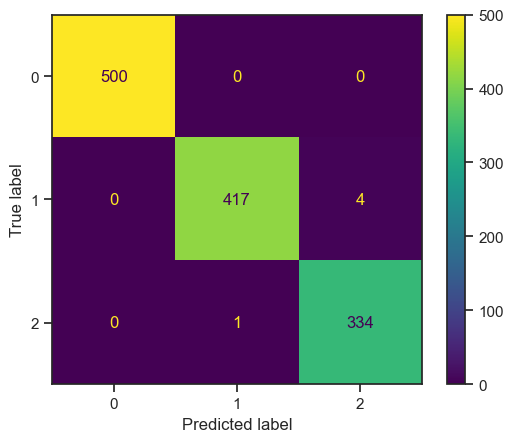

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the classifier on the training data
rf_clf.fit(X_train, y_train)

# Predict on the validation data
y_rf_pred = rf_clf.predict(X_valid)

# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_valid, y_rf_pred))

# Print the classification report
print('Report:')
print(classification_report(y_valid, y_rf_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_valid, y_rf_pred, labels=rf_clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()

# Show the plot
plt.show()

### Stratified K-Fold

In [55]:
def stratified_k_fold_cv(X_train_scaled, y_train, model, n_splits=5, random_state=42):
    
    # Initialize StratifiedKFold
    kf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    
    # Lists to store metrics
    train_f1_score_lst = []
    test_f1_score_lst = []
    train_recall_lst = []
    test_recall_lst = []
    train_precision_lst = []
    test_precision_lst = []
    
    fold = 1

    # Perform Stratified K-Fold CV
    for train_index_ls, validation_index_ls in kf.split(X_train_scaled, y_train):
        # Splitting the data
        train, validation = X_train_scaled.iloc[train_index_ls], X_train_scaled.iloc[validation_index_ls]
        target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
        
        # Fit the model
        model.fit(train, target_train)

        # Predictions on the validation set
        train_preds = model.predict(train)
        validation_preds = model.predict(validation)

        # Calculating metrics for training set
        train_recall_lst.append(recall_score(target_train, train_preds, average='macro'))
        train_precision_lst.append(precision_score(target_train, train_preds, average='macro'))
        train_f1_score_lst.append(f1_score(target_train, train_preds, average='macro'))
        
        # Calculating metrics for validation set
        test_recall_lst.append(recall_score(target_val, validation_preds, average='macro'))
        test_precision_lst.append(precision_score(target_val, validation_preds, average='macro'))
        test_f1_score_lst.append(f1_score(target_val, validation_preds, average='macro'))
        
        fold += 1
    
    # Create a DataFrame for the results
    results_df = pd.DataFrame({
        'Fold': range(1, n_splits + 1),
        'Train F1 Score': train_f1_score_lst,
        'Test F1 Score': test_f1_score_lst,
        'Train Recall': train_recall_lst,
        'Test Recall': test_recall_lst,
        'Train Precision': train_precision_lst,
        'Test Precision': test_precision_lst
    })

    # Format the DataFrame to 4 decimal places
    pd.options.display.float_format = '{:.4f}'.format
    display(results_df)

    # Calculate means and standard deviations of the metrics
    metrics = {
        'mean_train_recall': np.mean(train_recall_lst),
        'mean_test_recall': np.mean(test_recall_lst),
        'mean_train_precision': np.mean(train_precision_lst),
        'mean_test_precision': np.mean(test_precision_lst),
        'mean_train_f1_score': np.mean(train_f1_score_lst),
        'mean_test_f1_score': np.mean(test_f1_score_lst),
        'std_train_recall': np.std(train_recall_lst),
        'std_test_recall': np.std(test_recall_lst),
        'std_train_precision': np.std(train_precision_lst),
        'std_test_precision': np.std(test_precision_lst),
        'std_train_f1_score': np.std(train_f1_score_lst),
        'std_test_f1_score': np.std(test_f1_score_lst)
    }
    
    # Plotting F1 scores for each fold
    plt.figure(figsize=(10, 6))
    folds = list(range(1, len(train_f1_score_lst) + 1))
    plt.plot(folds, train_f1_score_lst, label='Train F1 Score', marker='o', color='blue')
    plt.plot(folds, test_f1_score_lst, label='Test F1 Score', marker='o',  color='red')
    plt.xlabel('Fold')
    plt.ylabel('F1 Score')
    plt.title('Train and Test F1 Scores for each Fold')
    plt.legend()
    plt.ylim([0, 1.1])
    #plt.grid(True)
    plt.show()
    
    # Display cross-validated scores
    print('\nThe following represent the mean of the cross validation metrics across all folds:')
    print("Mean Train Recall: {:.4f}".format(metrics['mean_train_recall']))
    print("Mean Test Recall: {:.4f}".format(metrics['mean_test_recall']))
    print()
    print("Mean Train Precision: {:.4f}".format(metrics['mean_train_precision']))
    print("Mean Test Precision: {:.4f}".format(metrics['mean_test_precision']))
    print()
    print("Mean Train F1 Score: {:.4f}".format(metrics['mean_train_f1_score']))
    print("Mean Test F1 Score: {:.4f}".format(metrics['mean_test_f1_score']))
    print()
    print('The following represent the standard deviation of the cross validation metrics across all folds:')
    print("Std Train Recall: {:.4f}".format(metrics['std_train_recall']))
    print("Std Test Recall: {:.4f}".format(metrics['std_test_recall']))
    print()
    print("Std Train Precision: {:.4f}".format(metrics['std_train_precision']))
    print("Std Test Precision: {:.4f}".format(metrics['std_test_precision']))
    print()
    print("Std Train F1 Score: {:.4f}".format(metrics['std_train_f1_score']))
    print("Std Test F1 Score: {:.4f}".format(metrics['std_test_f1_score']))

In [56]:
def model_evaluation(X_train, y_train, X_test, y_test, model):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Predict on the training set
    train_preds = model.predict(X_train)

    # Calculate training evaluation metrics
    train_balanced_accuracy = balanced_accuracy_score(y_train, train_preds)
    train_precision = precision_score(y_train, train_preds, average='macro')
    train_recall = recall_score(y_train, train_preds, average='macro')
    train_f1_score = f1_score(y_train, train_preds, average='macro')

    # Print the training evaluation metrics
    print("\nEvaluation on Training Set:")
    print("Balanced Accuracy: {:.4f}".format(train_balanced_accuracy))
    print("Precision: {:.4f}".format(train_precision))
    print("Recall: {:.4f}".format(train_recall))
    print("F1-Score: {:.4f}".format(train_f1_score))
    print(classification_report(y_train, train_preds))
    print()

    # Predict on the test set
    test_preds = model.predict(X_test)

    # Calculate test evaluation metrics
    test_balanced_accuracy = balanced_accuracy_score(y_test, test_preds)
    test_precision = precision_score(y_test, test_preds, average='macro')
    test_recall = recall_score(y_test, test_preds, average='macro')
    test_f1_score = f1_score(y_test, test_preds, average='macro')

    # Print the test evaluation metrics
    print("\nFinal Evaluation on Test Set:")
    print("Balanced Accuracy: {:.4f}".format(test_balanced_accuracy))
    print("Precision: {:.4f}".format(test_precision))
    print("Recall: {:.4f}".format(test_recall))
    print("F1-Score: {:.4f}".format(test_f1_score))
    print(classification_report(y_test, test_preds))

In [57]:
def optimize_rf(X_train, y_train, model, cv, max_evals):
    # Define a function to optimize the Random Forest hyperparameters

    def objective(params):
        # Convert parameters to the appropriate types
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['max_features'] = int(params['max_features'])
        params['min_samples_split'] = int(params['min_samples_split'])
        params['min_samples_leaf'] = int(params['min_samples_leaf'])
        params['criterion'] = str(params['criterion'])

        # Initialize the Random Forest classifier with given parameters
        clf = RandomForestClassifier(**params)

        # Lists to store F1 scores for training and validation sets
        train_f1s = []
        val_f1s = []

        # Perform cross-validation
        for train_idx, val_idx in cv.split(X_train, y_train):
            # Split the data into training and validation sets
            X_t, X_v = X_train[train_idx], X_train[val_idx]
            y_t, y_v = y_train[train_idx], y_train[val_idx]

            # Train the classifier on the training set
            clf.fit(X_t, y_t)

            # Predict on the training and validation sets
            train_preds = clf.predict(X_t)
            val_preds = clf.predict(X_v)

            # Calculate F1 scores for training and validation sets
            train_f1 = f1_score(y_t, train_preds, average='macro')
            val_f1 = f1_score(y_v, val_preds, average='macro')

            # Append the scores to the respective lists
            train_f1s.append(train_f1)
            val_f1s.append(val_f1)

        # Calculate mean F1 scores for training and validation sets
        mean_train_f1 = np.mean(train_f1s)
        mean_val_f1 = np.mean(val_f1s)

        # Calculate the difference between training and validation scores
        diff = mean_train_f1 - mean_val_f1

        # Apply penalty if the difference is greater than 0.05
        if diff > 0.05:
            penalty = diff
        else:
            penalty = 0

        # Calculate the final score by subtracting the penalty from validation score
        score = mean_val_f1 - penalty

        # Return the loss (negative score) and other relevant information
        return {'loss': -score, 'status': STATUS_OK, 'params': params, 'train_f1': mean_train_f1, 'val_f1': mean_val_f1}

    # Define the hyperparameter space for optimization
    space = {
        'n_estimators': hp.quniform('n_estimators', 10, 10000, 1),
        'max_depth': hp.quniform('max_depth', 1, 1000, 1),
        'max_features': hp.quniform('max_features', 1, 6, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
        'criterion': hp.choice('criterion', ['gini', 'entropy'])
    }

    # Initialize a Trials object to store the results of each trial
    trials = Trials()

    # Use the fmin function from hyperopt to find the best hyperparameters
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    # Extract information from the best trial
    best_trial = min(trials.trials, key=lambda x: x['result']['loss'])
    best_params = best_trial['result']['params']
    best_train_f1 = best_trial['result']['train_f1']
    best_val_f1 = best_trial['result']['val_f1']

    # Print the best parameters and corresponding F1 scores
    print(f"Best Parameters: {best_params}")
    print(f"Training F1: {best_train_f1}")
    print(f"Validation F1: {best_val_f1}")

    # Plot training and validation scores for each trial
    iterations = list(range(len(trials.trials)))
    train_f1s = [trial['result']['train_f1'] for trial in trials.trials]
    val_f1s = [trial['result']['val_f1'] for trial in trials.trials]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, train_f1s, label='Training F1', marker='o', color='blue')
    plt.plot(iterations, val_f1s, label='Validation F1', marker='o', color='red')
    plt.xlabel('Trial')
    plt.ylabel('F1 Score')
    plt.title('Training and Validation F1 over Trials')
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()

    # Plot training and validation scores for each numeric hyperparameter
    numeric_params = ['n_estimators', 'max_depth', 'max_features', 'min_samples_split', 'min_samples_leaf']
    for param in numeric_params:
        values = [trial['result']['params'][param] for trial in trials.trials]
        if len(set(values)) >= 5:  # Ensure at least 5 different values explored
            plt.figure(figsize=(10, 6))
            plt.scatter(values, train_f1s, label='Training F1', marker='o', color='blue', edgecolors='black')
            plt.scatter(values, val_f1s, label='Validation F1', marker='o', color='red', edgecolors='black')
            plt.xlabel(param)
            plt.ylabel('F1 Score')
            plt.title(f'Training and Validation F1 vs {param}')
            plt.ylim([0,1.1])
            plt.legend()
            plt.show()

    return best_params, best_train_f1, best_val_f1, trials
    # Return the best parameters and corresponding F1 scores along with the trials object

Fold  Train F1 Score  Test F1 Score  Train Recall  Test Recall  \
0     1          1.0000         0.9944        1.0000       0.9940   
1     2          1.0000         0.9989        1.0000       0.9988   
2     3          1.0000         0.9933        1.0000       0.9936   
3     4          1.0000         0.9955        1.0000       0.9958   
4     5          1.0000         0.9978        1.0000       0.9978   

   Train Precision  Test Precision  
0           1.0000          0.9948  
1           1.0000          0.9990  
2           1.0000          0.9931  
3           1.0000          0.9953  
4           1.0000          0.9978

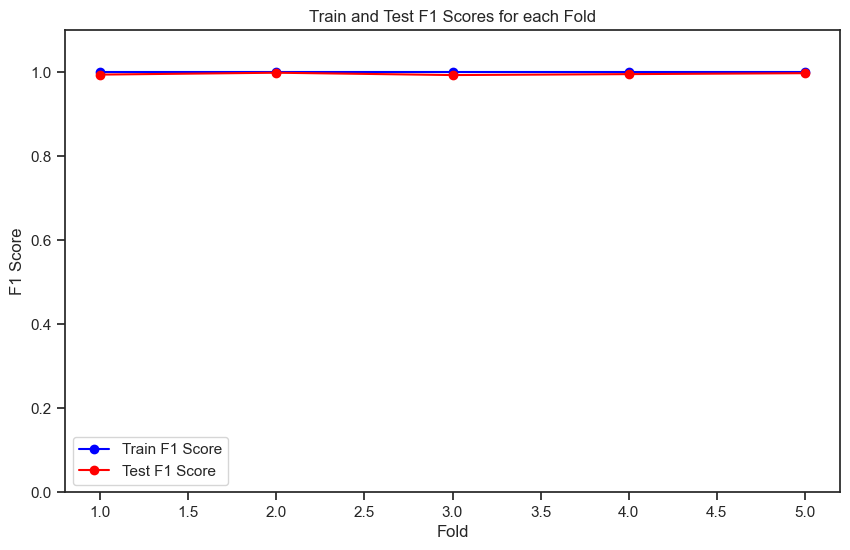


The following represent the mean of the cross validation metrics across all folds:
Mean Train Recall: 1.0000
Mean Test Recall: 0.9960

Mean Train Precision: 1.0000
Mean Test Precision: 0.9960

Mean Train F1 Score: 1.0000
Mean Test F1 Score: 0.9960

The following represent the standard deviation of the cross validation metrics across all folds:
Std Train Recall: 0.0000
Std Test Recall: 0.0020

Std Train Precision: 0.0000
Std Test Precision: 0.0021

Std Train F1 Score: 0.0000
Std Test F1 Score: 0.0021


In [58]:
# Define Model Object
model_rf = RandomForestClassifier(random_state = 42)

# Cross validate the model object on the training data
stratified_k_fold_cv(X_train, y_train, model_rf)

In [59]:
model_evaluation(X_train, y_train, X_valid, y_valid, model_rf)


Evaluation on Training Set:
Balanced Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      1685
           2       1.00      1.00      1.00      1339

    accuracy                           1.00      5024
   macro avg       1.00      1.00      1.00      5024
weighted avg       1.00      1.00      1.00      5024



Final Evaluation on Test Set:
Balanced Accuracy: 0.9958
Precision: 0.9953
Recall: 0.9958
F1-Score: 0.9955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      0.99      0.99       421
           2       0.99      1.00      0.99       335

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256



## 5.2 Hyperparameter Tuning

100%|████████████████████████████████████████████████| 5/5 [53:00<00:00, 636.16s/trial, best loss: -0.9933680729884292]
Best Parameters: {'criterion': 'gini', 'max_depth': 596, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 6569}
Training F1: 0.9968711391075485
Validation F1: 0.9933680729884292


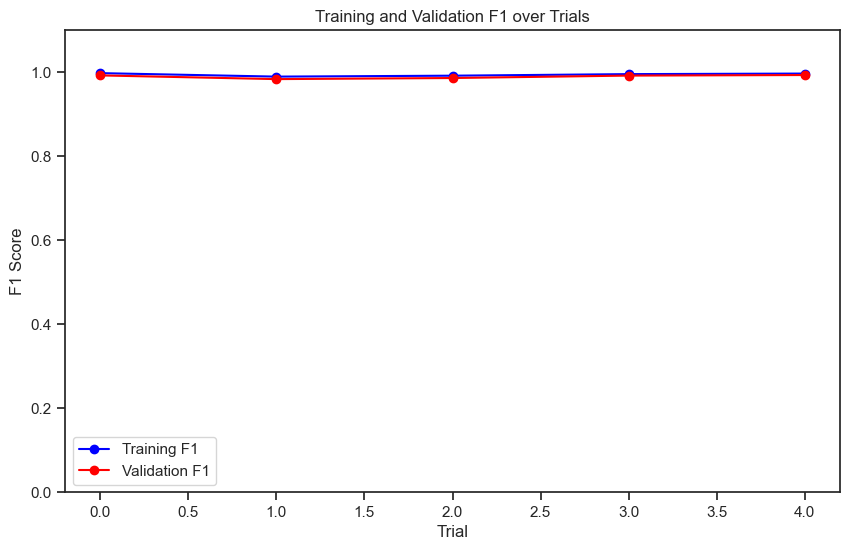

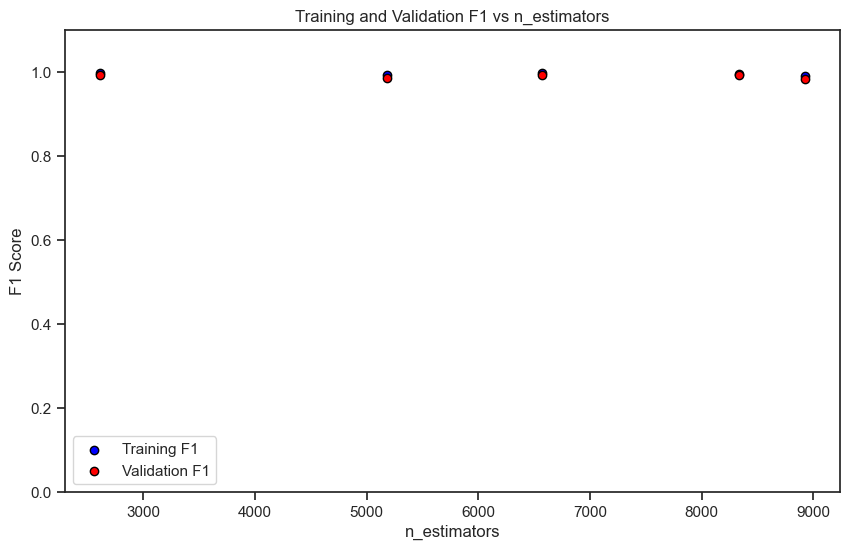

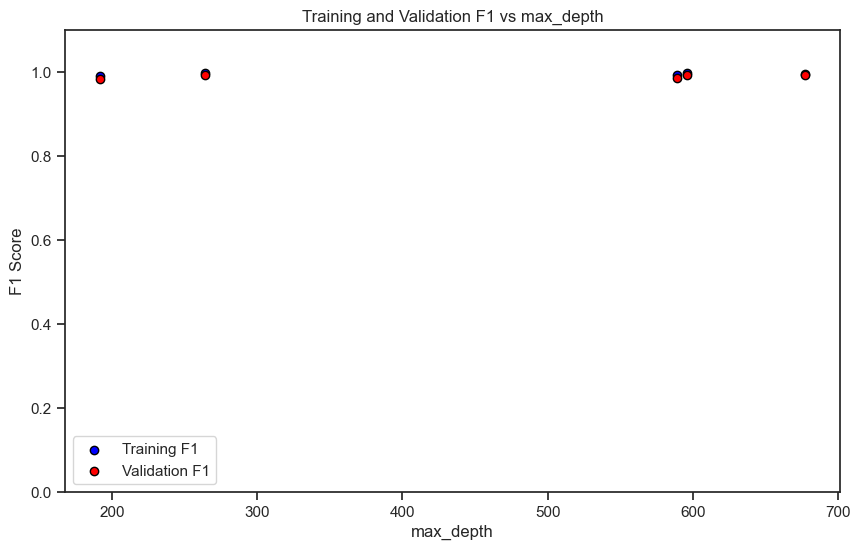

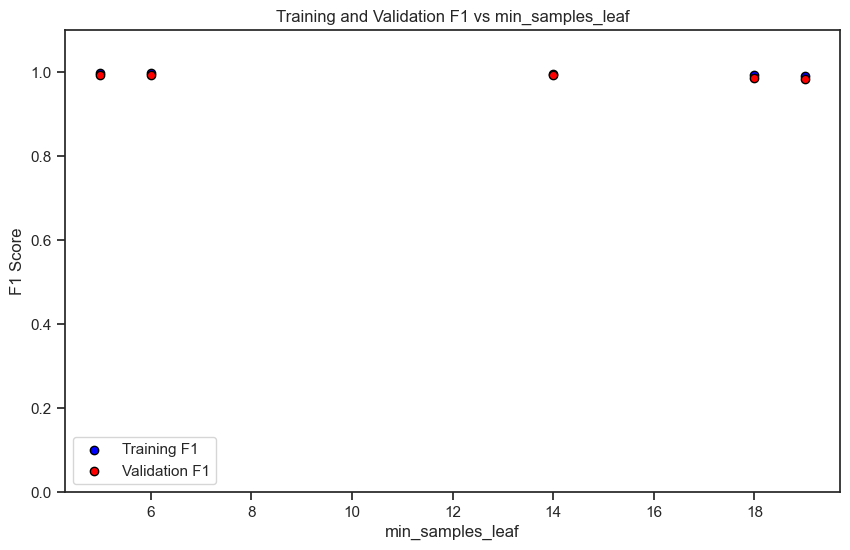

Best Train F1-Score: 0.9968711391075485
Best Test F1-Score: 0.9933680729884292
CPU times: total: 29min 38s
Wall time: 53min 2s


In [60]:
%%time
# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)
X_train_ = np.array(X_train)
y_train_ = np.array(y_train)
# Run Hyperparameter Tuning
best_params, best_train_f1, best_val_f1, trials = optimize_rf(X_train_, y_train_, model_rf, cv=cv, max_evals=5)
print(f'Best Train F1-Score: {best_train_f1}')
print(f'Best Test F1-Score: {best_val_f1}')

In [61]:
# Define Model Object
model_rf_tuned = RandomForestClassifier(**best_params, random_state = 42)

Fold  Train F1 Score  Test F1 Score  Train Recall  Test Recall  \
0     1          0.9965         0.9933        0.9968       0.9930   
1     2          0.9970         0.9989        0.9972       0.9988   
2     3          0.9978         0.9890        0.9979       0.9897   
3     4          0.9967         0.9934        0.9970       0.9937   
4     5          0.9959         0.9923        0.9962       0.9927   

   Train Precision  Test Precision  
0           0.9961          0.9936  
1           0.9967          0.9990  
2           0.9977          0.9884  
3           0.9964          0.9931  
4           0.9956          0.9918

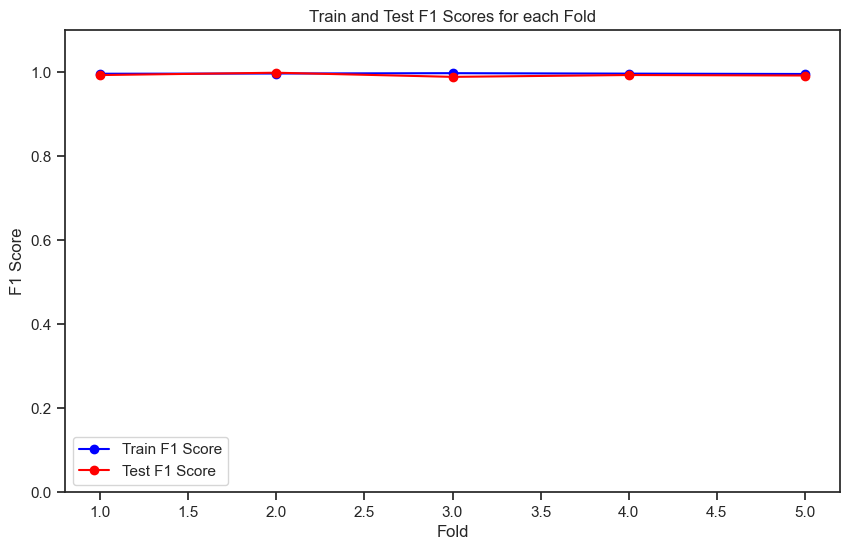


The following represent the mean of the cross validation metrics across all folds:
Mean Train Recall: 0.9970
Mean Test Recall: 0.9936

Mean Train Precision: 0.9965
Mean Test Precision: 0.9932

Mean Train F1 Score: 0.9968
Mean Test F1 Score: 0.9934

The following represent the standard deviation of the cross validation metrics across all folds:
Std Train Recall: 0.0006
Std Test Recall: 0.0029

Std Train Precision: 0.0007
Std Test Precision: 0.0034

Std Train F1 Score: 0.0006
Std Test F1 Score: 0.0032


In [62]:
# Cross validate the model object on the training data
stratified_k_fold_cv(X_train, y_train, model_rf_tuned)

In [63]:
model_evaluation(X_train, y_train, X_valid, y_valid, model_rf_tuned)


Evaluation on Training Set:
Balanced Accuracy: 0.9981
Precision: 0.9979
Recall: 0.9981
F1-Score: 0.9980
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      1685
           2       0.99      1.00      1.00      1339

    accuracy                           1.00      5024
   macro avg       1.00      1.00      1.00      5024
weighted avg       1.00      1.00      1.00      5024



Final Evaluation on Test Set:
Balanced Accuracy: 0.9962
Precision: 0.9951
Recall: 0.9962
F1-Score: 0.9956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      0.99      1.00       421
           2       0.99      1.00      0.99       335

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256



# Regression Model for ROP

### Well 58-32

In [9]:
df_drill_58_32_ = df_drill_58_32.copy()
df_drill_58_32_.head(2)

DEPTH    ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW Lithology
0  85.18  56.80  0.0         463.72    8.93  151.09    1109.58  8.6  Alluvium
1  86.18  61.14  0.0         459.53    8.93  151.09    1108.36  8.6  Alluvium

In [10]:
# Drop rows where DEPTH is greater than or equal to 3050
df_drill_58_32_ = df_drill_58_32_[df_drill_58_32_['DEPTH'] < 3250]

### Well 56-32

In [11]:
#Read drilling data into pandas dataframe
rawdata_drill_56_32 = pd.read_csv('well-56-32.csv')
rawdata_drill_56_32.head(2)

Hole Depth (feet)  ROP (ft_per_hr)  Weight on Bit (klbs)  Rotary RPM (RPM)  \
0              855.0              0.0                   0.0              5.24   
1              855.0              0.0                   0.0              0.86   

   Standpipe Pressure (psi)  Rotary Torque (kft_lb)  Flow (flow_percent)  \
0                       0.0                     0.0                 1.18   
1                       0.0                     0.0                 1.18   

   Total Mud Volume (barrels)  PVT Total Mud Gain/Loss (barrels)  \
0                      503.21                              -12.5   
1                      503.21                              -12.5   

   P1 Rate (gal_per_min)  Bit RPM (RPM)  Bit Torque (kft_lb)  \
0                    0.0            6.0                  0.0   
1                    0.0            1.0                  0.0   

   Depth of Cut (in)  Hole Diameter (in) Mechanical Specific Energy (ksi)  \
0                0.0                8.75                          -999.25   
1                0.0                8.75                          -999.25   

   Min RPM (RPM)  Min Torque (kft_lb)  Min WOB (klbs)  \
0           0.52                  0.0             0.0   
1           0.03                  0.0             0.0   

   Motor Max Torque (ft_lb)  Motor RPM (RPM)  MSE Total (Units)  \
0                      11.0              0.0            -999.25   
1                      11.0              0.0            -999.25   

   Overall ROP (ft_per_hr)  Top Drive Left Torque Limit (kft_lb)  \
0                      0.0                                   0.0   
1                      0.0                                   0.0   

   Top Drive Right Torque Limit (kft_lb)  Top Drive Rotary (RPM)  \
0                                    0.0                     5.0   
1                                    0.0                     1.0   

   Top Drive Torque (kft_lb)  TTS Mechanical Specific Energy (ksi)  \
0                     -0.023                               -999.25   
1                     -0.023                               -999.25   

   Differential Pressure (psi)  Motor Max Diff (psi)  \
0                     -1501.01              1350.002   
1                     -1501.01              1350.002   

   Motor Max Torque (ft_lb).1  
0                        11.0  
1                        11.0

In [12]:
rawdata_drill_56_32.columns

Index(['Hole Depth (feet)', 'ROP (ft_per_hr)', 'Weight on Bit (klbs)',
       'Rotary RPM (RPM)', 'Standpipe Pressure (psi)',
       'Rotary Torque (kft_lb)', 'Flow (flow_percent)',
       'Total Mud Volume (barrels)', 'PVT Total Mud Gain/Loss (barrels)',
       'P1 Rate (gal_per_min)', 'Bit RPM (RPM)', 'Bit Torque (kft_lb)',
       'Depth of Cut (in)', 'Hole Diameter (in)',
       'Mechanical Specific Energy (ksi)', 'Min RPM (RPM)',
       'Min Torque (kft_lb)', 'Min WOB (klbs)', 'Motor Max Torque (ft_lb)',
       'Motor RPM (RPM)', 'MSE Total (Units)', 'Overall ROP (ft_per_hr)',
       'Top Drive Left Torque Limit (kft_lb)',
       'Top Drive Right Torque Limit (kft_lb)', 'Top Drive Rotary (RPM)',
       'Top Drive Torque (kft_lb)', 'TTS Mechanical Specific Energy (ksi)',
       'Differential Pressure (psi)', 'Motor Max Diff (psi)',
       'Motor Max Torque (ft_lb).1'],
      dtype='object')

In [13]:
df_drill_56_32 = rawdata_drill_56_32[['Hole Depth (feet)', 'ROP (ft_per_hr)', 'Weight on Bit (klbs)',
                                       'Rotary Torque (kft_lb)', 'Rotary RPM (RPM)',
                                       'P1 Rate (gal_per_min)']]
# Rename the features of the new dataframe
df_drill_56_32 = df_drill_56_32.rename(columns={'Hole Depth (feet)': 'DEPTH'})
df_drill_56_32 = df_drill_56_32.rename(columns={'ROP (ft_per_hr)': 'ROP'})
df_drill_56_32 = df_drill_56_32.rename(columns={'Weight on Bit (klbs)': 'WOB'})
df_drill_56_32 = df_drill_56_32.rename(columns={'Rotary Torque (kft_lb)': 'Torque'})
df_drill_56_32 = df_drill_56_32.rename(columns={'Rotary RPM (RPM)': 'RPM'})
df_drill_56_32 = df_drill_56_32.rename(columns={'P1 Rate (gal_per_min)': 'Flow_Rate'})

df_drill_56_32.head(2)

DEPTH  ROP  WOB  Torque   RPM  Flow_Rate
0  855.0  0.0  0.0     0.0  5.24        0.0
1  855.0  0.0  0.0     0.0  0.86        0.0

In [14]:
# Add a new column for integer depth for grouping
df_drill_56_32['DEPTH_int'] = df_drill_56_32['DEPTH'].apply(int)

# Group by the integer DEPTH and calculate the mean for all other columns
df_drill_56_32_ = df_drill_56_32.groupby('DEPTH_int').mean()

# Optionally, drop the 'DEPTH_int' column if it's included in the result
if 'DEPTH_int' in df_drill_56_32_.columns:
    df_drill_56_32_ = df_drill_56_32_.drop(columns=['DEPTH_int'])

# Display the first few rows of the grouped DataFrame
df_drill_56_32_.head()
df_drill_56_32_.describe()

DEPTH          ROP          WOB       Torque          RPM  \
count  8167.000000  8167.000000  8167.000000  8167.000000  8167.000000   
mean   4956.878395   306.102981     3.228633     1.154567    44.546259   
std    2365.602303    71.357826     1.535710     0.503585     6.862797   
min     855.013776     0.000000     0.000000    -0.002364     0.000000   
25%    2905.950000   280.861923     2.250000     0.767944    40.170000   
50%    4961.435714   309.588182     3.544444     0.907000    45.080000   
75%    7002.913636   341.929500     4.318182     1.508254    50.980000   
max    9145.000000   879.125000    19.189249     2.557406    60.786429   

         Flow_Rate  
count  8167.000000  
mean    199.334493  
std      16.267504  
min       0.000000  
25%     198.910833  
50%     201.042500  
75%     203.356667  
max     225.702000

In [15]:
df_drill_56_32_ = df_drill_56_32_.rename_axis('DEPTH_int').reset_index()
df_drill_56_32_.head(2)

DEPTH_int       DEPTH       ROP       WOB    Torque        RPM   Flow_Rate
0        855  855.013776  0.004745  0.051276  0.446668   9.740893   85.661658
1        856  856.447059  2.614706  1.441176  0.729412  29.380000  205.200000

In [16]:
df_drill_56_32_ = df_drill_56_32_.drop(columns=['DEPTH_int'])
df_drill_56_32_.head(2)

DEPTH       ROP       WOB    Torque        RPM   Flow_Rate
0  855.013776  0.004745  0.051276  0.446668   9.740893   85.661658
1  856.447059  2.614706  1.441176  0.729412  29.380000  205.200000

### Assignation of mud weights from the drilling mud reports for Well 56-32.

The mud weights used for drilling the various sections of the well were gotten from the drilling mud reports and assigned as a function of the well depth.

In [17]:
# create a function to assign mud weight used for different depth range
def mud_weight_56_32(DEPTH):
    if (DEPTH < 3309):
        return 8.8
    elif (3309 < DEPTH <= 3506):
        return 8.8  
    elif (3506 < DEPTH <= 5143):
        return 9.0   
    elif (5143 < DEPTH <= 5999):
        return 8.7  
    elif (5999 < DEPTH <= 7620):
        return 8.8   
    elif (7620 < DEPTH <= 7663):
        return 8.9    
    elif (7663 < DEPTH <= 9145):
        return 9.0  
    else:
        return np.nan

In [18]:
# create a function to assign days in the week based on the associated numbers with 0 being Monday and 6 being sunday
df_drill_56_32_['MW'] = df_drill_56_32_['DEPTH'].apply(mud_weight_56_32)
df_drill_56_32_.head(2)

DEPTH       ROP       WOB    Torque        RPM   Flow_Rate   MW
0  855.013776  0.004745  0.051276  0.446668   9.740893   85.661658  8.8
1  856.447059  2.614706  1.441176  0.729412  29.380000  205.200000  8.8

In [19]:
# Drop rows where DEPTH is greater than or equal to 3050
df_drill_56_32_ = df_drill_56_32_[df_drill_56_32_['DEPTH'] < 3050]

### Assignation of lithologies from the Mud logging report for Well 56-32.

The lithologies encountered while drilling the wells were gottten from the Mud logging report and assigned as a function of the well depth.

In [20]:
# create a function to assign mud weight used for different depth range
def lithology_56_32(DEPTH):
    if (DEPTH <= 3050):
        return 'Alluvium'
    else:
        return np.nan

In [21]:
df_drill_56_32_['Lithology'] = df_drill_56_32_['DEPTH'].apply(lithology_56_32)
df_drill_56_32_.head(2)

DEPTH       ROP       WOB    Torque        RPM   Flow_Rate   MW  \
0  855.013776  0.004745  0.051276  0.446668   9.740893   85.661658  8.8   
1  856.447059  2.614706  1.441176  0.729412  29.380000  205.200000  8.8   

  Lithology  
0  Alluvium  
1  Alluvium

In [22]:
df_drill_56_32_['Well_ID'] = "56-32"
df_drill_56_32_.head(2)

DEPTH       ROP       WOB    Torque        RPM   Flow_Rate   MW  \
0  855.013776  0.004745  0.051276  0.446668   9.740893   85.661658  8.8   
1  856.447059  2.614706  1.441176  0.729412  29.380000  205.200000  8.8   

  Lithology Well_ID  
0  Alluvium   56-32  
1  Alluvium   56-32

### Merge well data

Both wells data were merged to be the final data with the important predictive features (ROP, RPM, WOB, Flow Rate, Lithology, and Mud Weight)

In [21]:
# Removing the 'Pump_Pressure' column from the DataFrame
df_drill_58_32_ = df_drill_58_32_.drop(columns=['Pump_Pressure'])

In [23]:
df_drill_58_32_['Well_ID'] = "58-32"
df_drill_58_32_.head(2)

DEPTH    ROP  WOB  Pump_Pressure  Torque     RPM  Flow_Rate   MW Lithology  \
0  85.18  56.80  0.0         463.72    8.93  151.09    1109.58  8.6  Alluvium   
1  86.18  61.14  0.0         459.53    8.93  151.09    1108.36  8.6  Alluvium   

  Well_ID  
0   58-32  
1   58-32

In [24]:
df_drill_58_32_.columns

Index(['DEPTH', 'ROP', 'WOB', 'Pump_Pressure', 'Torque', 'RPM', 'Flow_Rate',
       'MW', 'Lithology', 'Well_ID'],
      dtype='object')

In [24]:
df_drill_56_32_.columns

Index(['DEPTH', 'ROP', 'WOB', 'Torque', 'RPM', 'Flow_Rate', 'MW', 'Lithology',
       'Well_ID'],
      dtype='object')

In [25]:
df_58_32 = df_drill_58_32_[['DEPTH', 'ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque', 'MW', 'Lithology', 'Well_ID']]

In [26]:
df_56_32 = df_drill_56_32_[['DEPTH', 'ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque', 'MW', 'Lithology', 'Well_ID']]

In [27]:
dataframes = (df_58_32, df_56_32)
final_df = pd.concat(dataframes, ignore_index = True)
final_df.describe()

DEPTH          ROP          WOB    Flow_Rate          RPM  \
count  5245.000000  5245.000000  5245.000000  5245.000000  5245.000000   
mean   1787.711214   183.906904    10.633007   555.865207    59.017887   
std     817.156141   156.444513     9.237678   319.099688    25.812649   
min      85.180000     0.000000     0.000000     0.000000     0.000000   
25%    1149.624242    45.170000     2.410000   199.504545    40.170000   
50%    1812.336364   120.510000     6.920000   692.660000    51.020000   
75%    2472.930000   316.730769    19.480000   850.380000    80.830000   
max    3249.330000  2977.910000    39.490000  2507.790000   271.580000   

            Torque           MW  
count  5245.000000  5245.000000  
mean     69.725456     9.009476  
std      72.681422     0.218988  
min       0.000000     8.600000  
25%       0.737889     8.800000  
50%      11.260000     9.200000  
75%     145.950000     9.200000  
max     257.090000     9.500000

In [28]:
final_df.to_csv('train.csv', index=False)

### 2. Data Preparation

In [29]:
rawdata = pd.read_csv('train.csv')
rawdata.head(2)

DEPTH    ROP  WOB  Flow_Rate     RPM  Torque   MW Lithology Well_ID
0  85.18  56.80  0.0    1109.58  151.09    8.93  8.6  Alluvium   58-32
1  86.18  61.14  0.0    1108.36  151.09    8.93  8.6  Alluvium   58-32

In [30]:
rawdata.to_csv('rawdata.csv', index=False)

### 2.2: Data Missingness

In [31]:
# Determine the fraction of missingness
rawdata.isna().sum()

DEPTH        0
ROP          0
WOB          0
Flow_Rate    0
RPM          0
Torque       0
MW           0
Lithology    0
Well_ID      0
dtype: int64

### 2.3: Outlier Treatment 

Possible outliers present could be related to measurement errors from the logging sensors or sensor malfunctioning.

In [32]:
# View the columns of the data
rawdata.columns

Index(['DEPTH', 'ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque', 'MW', 'Lithology',
       'Well_ID'],
      dtype='object')

### 2.3.1: Univariate Analysis

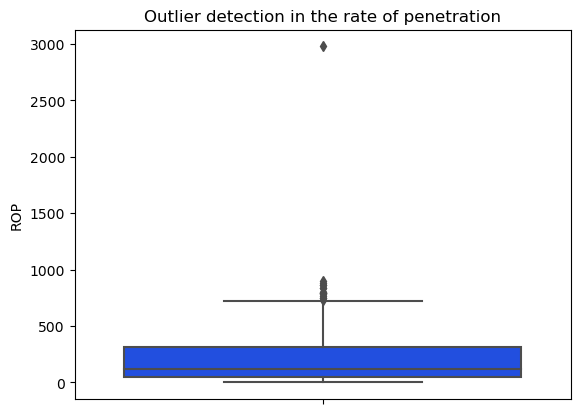

In [33]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['ROP'], palette = "bright")
plt.title('Outlier detection in the rate of penetration')
plt.show()

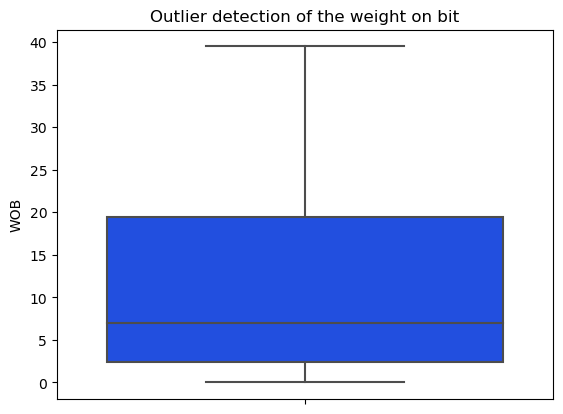

In [34]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['WOB'], palette = "bright")
plt.title('Outlier detection of the weight on bit')
plt.show()

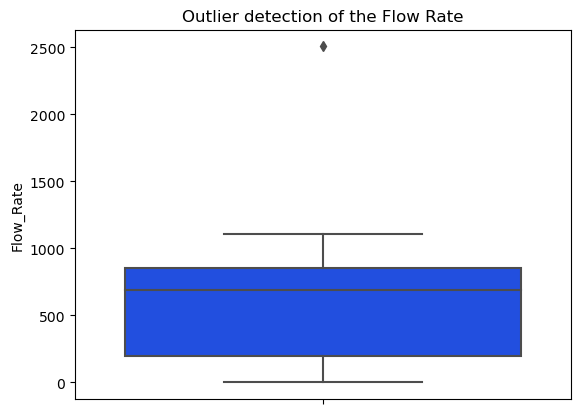

In [35]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Flow_Rate'], palette = "bright")
plt.title('Outlier detection of the Flow Rate')
plt.show()

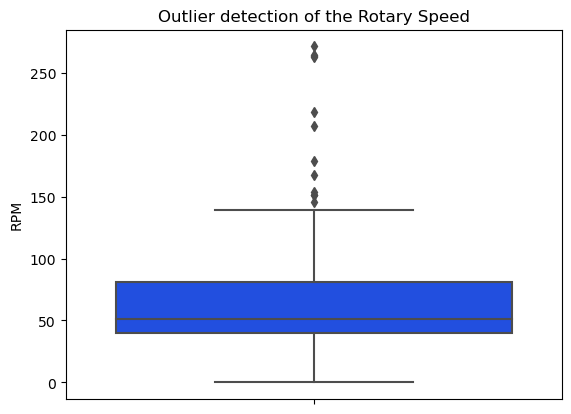

In [36]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['RPM'], palette = "bright")
plt.title('Outlier detection of the Rotary Speed')
plt.show()

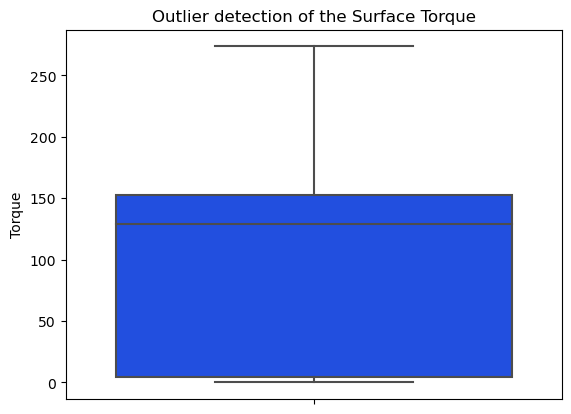

In [37]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['Torque'], palette = "bright")
plt.title('Outlier detection of the Surface Torque')
plt.show()

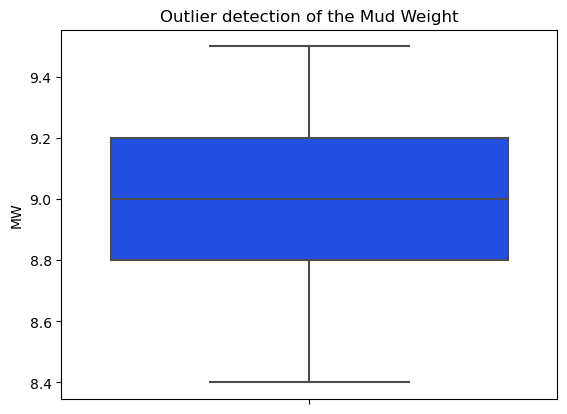

In [38]:
# Univariate analysis for outlier detection
sns.boxplot(y=rawdata['MW'], palette = "bright")
plt.title('Outlier detection of the Mud Weight')
plt.show()

### 2.3.2: Bivariate Analysis

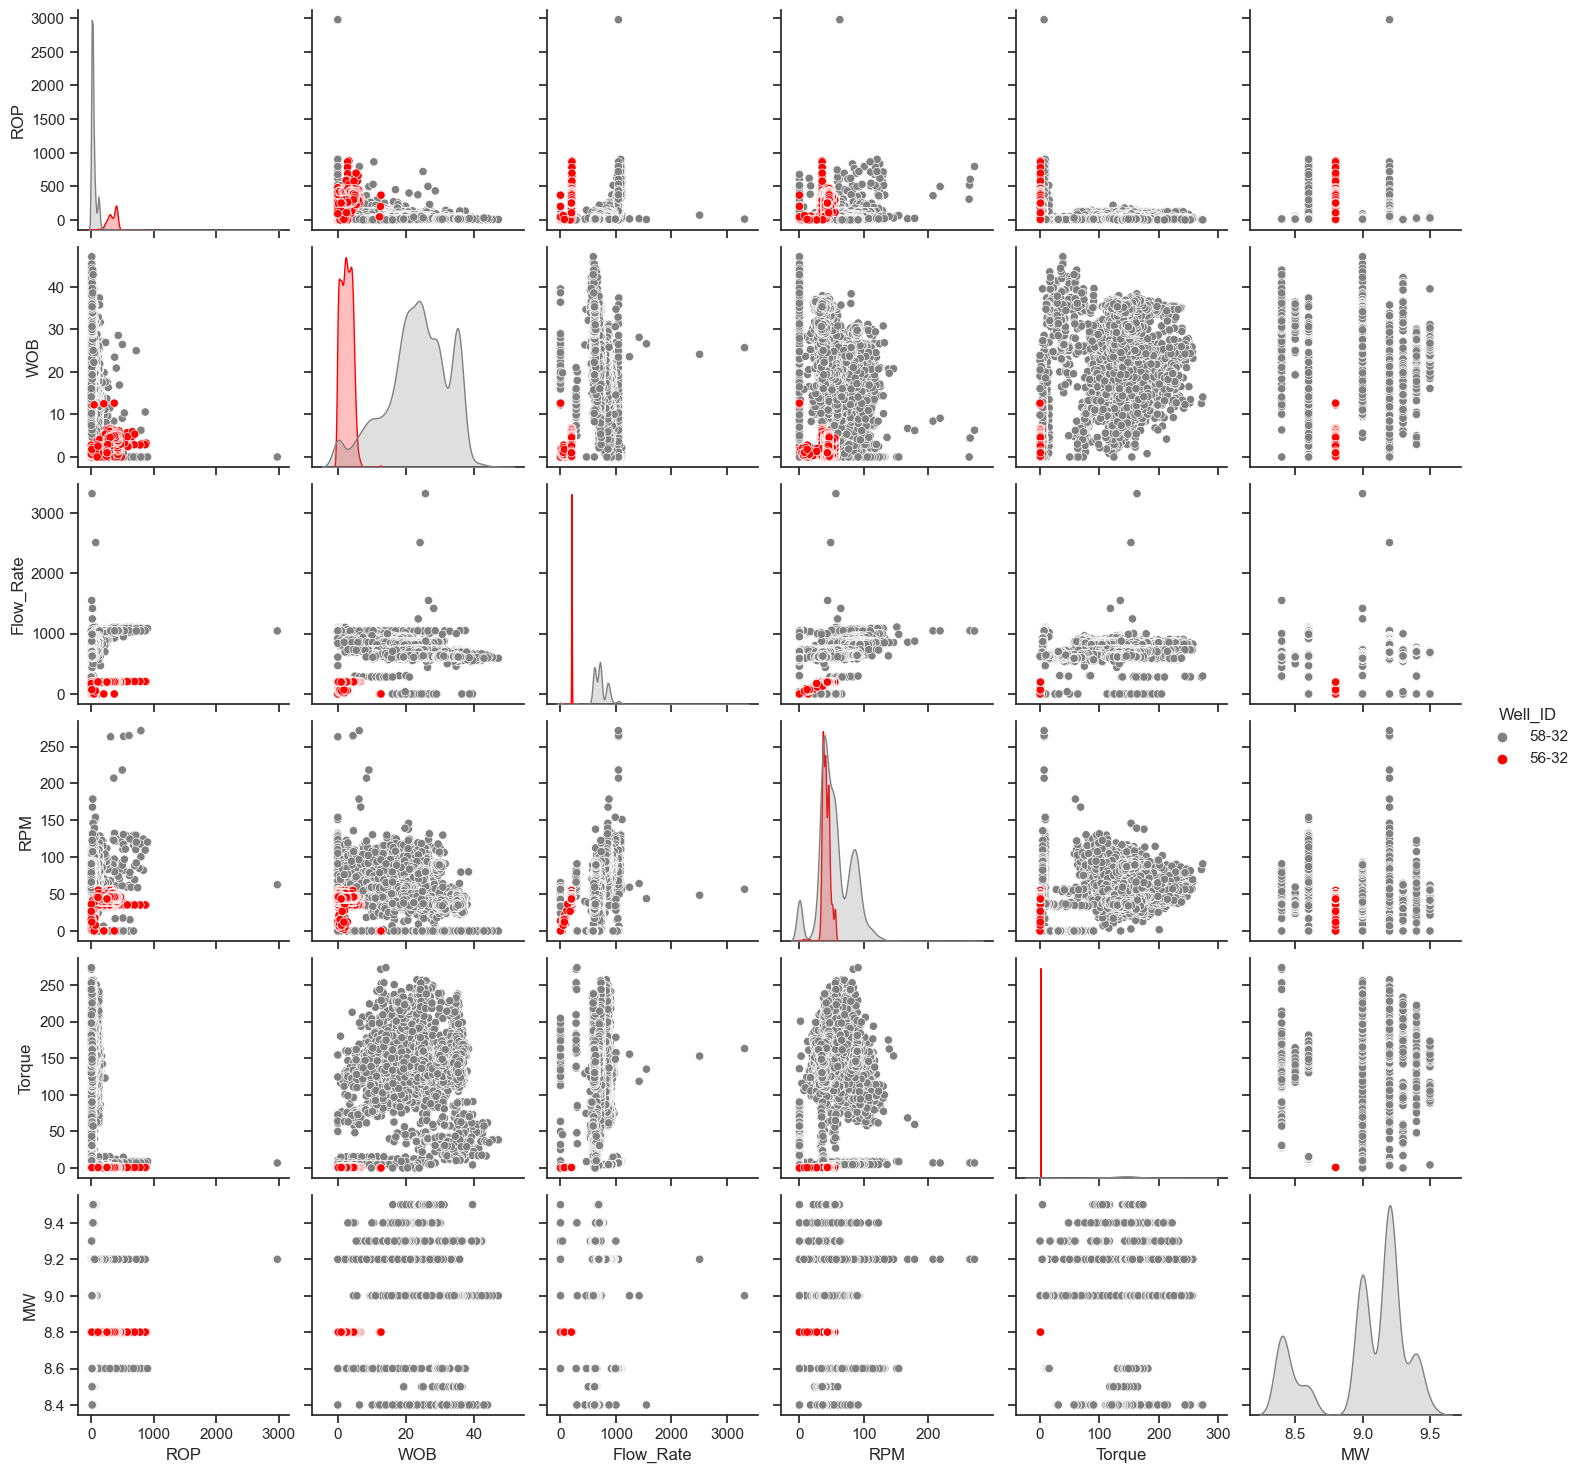

In [39]:
### sns.set(style = 'ticks') # Set the background to dark
# Create an array with the colors you want to use
sns.set(style='ticks')
colors = ['grey', 'red', 'green']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
# Create a pair plot
sns.pairplot(rawdata, y_vars=['ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque',
       'MW'],x_vars=['ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque',
       'MW'], palette = customPalette, hue = 'Well_ID') 

In [40]:
# Capping the observed outliers
rawdata = rawdata[rawdata['ROP'] < 1000]
rawdata = rawdata[rawdata['Flow_Rate'] < 1200]
rawdata = rawdata[rawdata['RPM'] < 150]

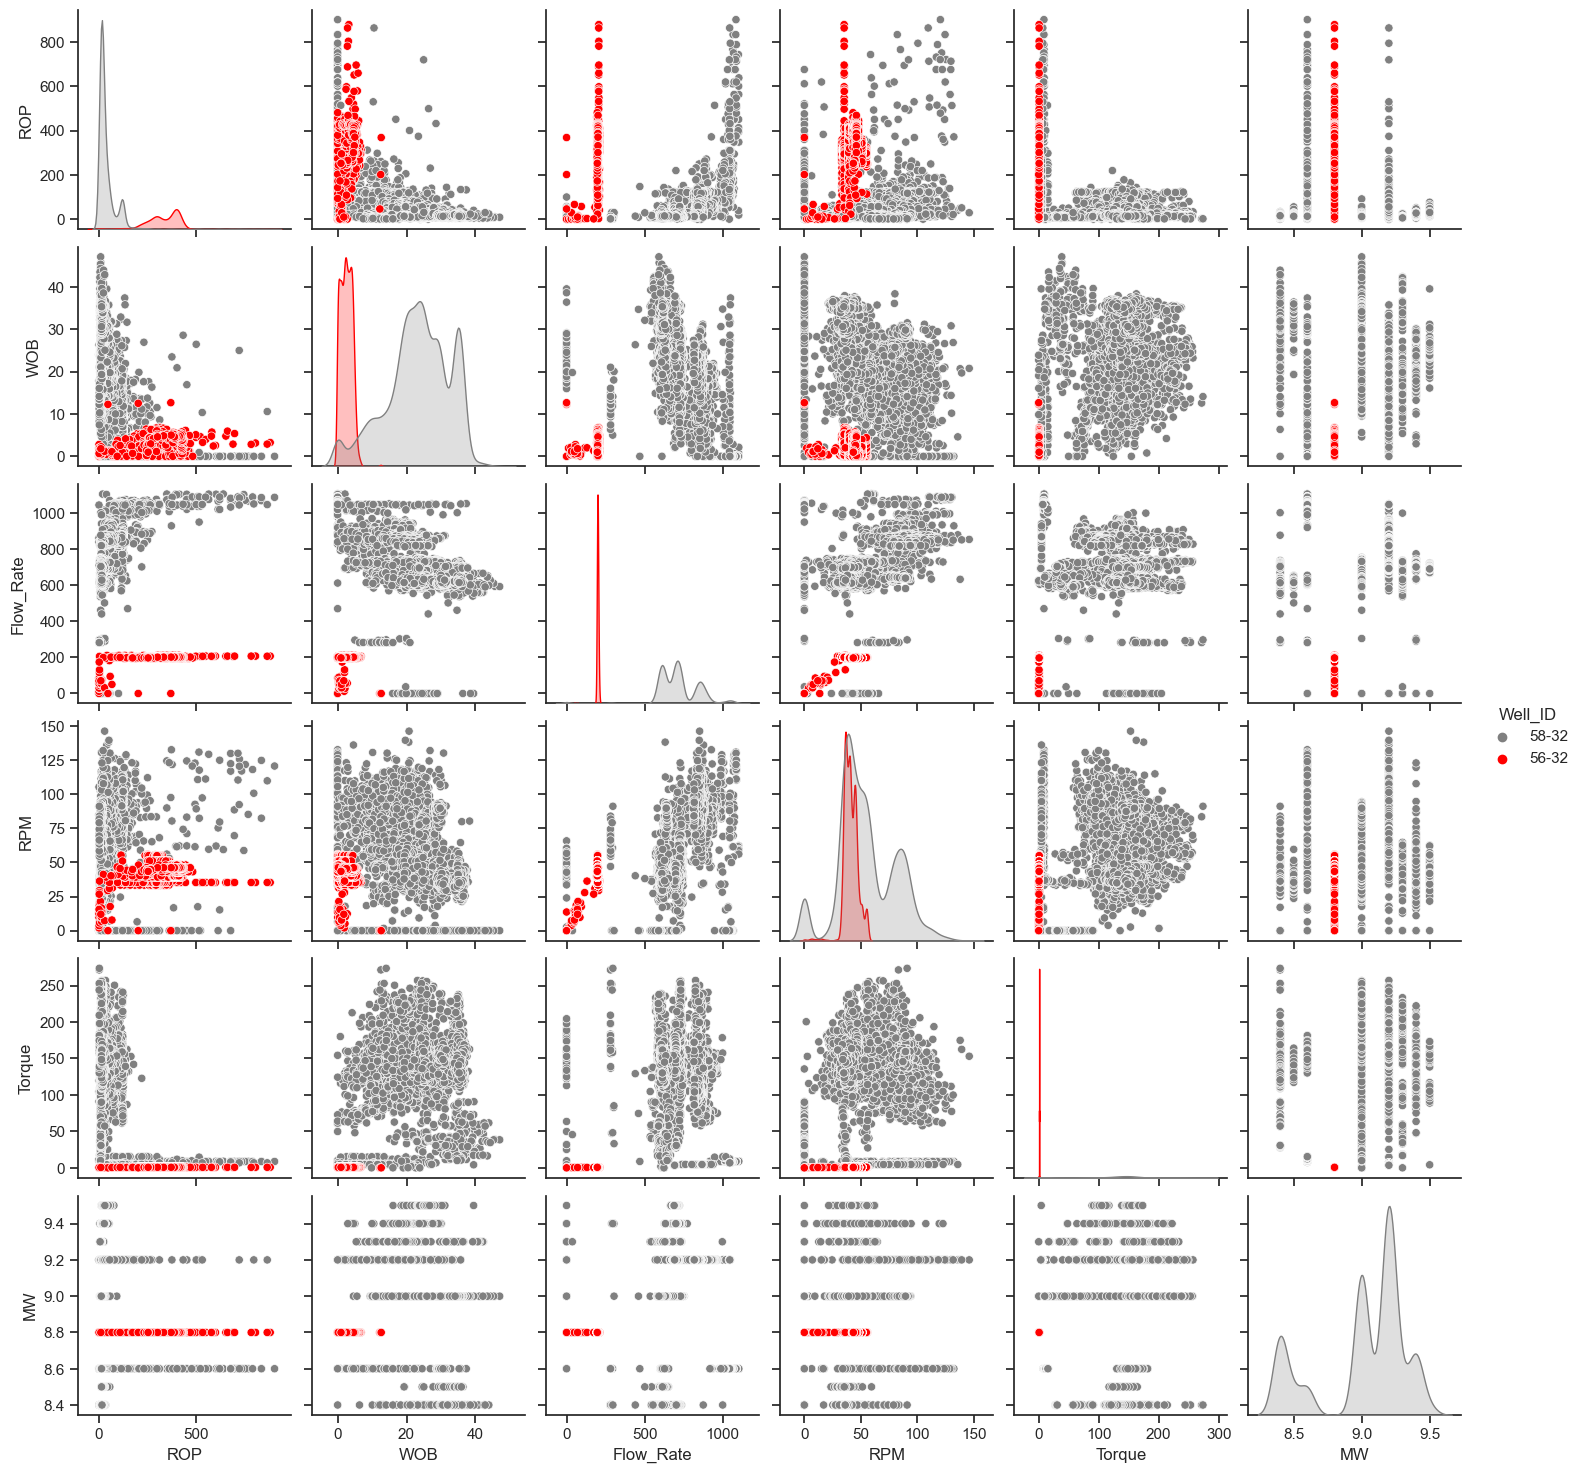

In [41]:
### sns.set(style = 'ticks') # Set the background to dark
# Create an array with the colors you want to use
sns.set(style='ticks')
colors = ['grey', 'red', 'green']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
# Create a pair plot
sns.pairplot(rawdata, y_vars=['ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque',
       'MW'],x_vars=['ROP', 'WOB', 'Flow_Rate', 'RPM', 'Torque',
       'MW'], palette = customPalette, hue = 'Well_ID') 

**Inferences**

From the above analysis, the following inferences were obtained.
* Outliers were identified in the ROP features and were capped at max of 750 ft/hr and min greater than 0 ft/hr
* Negative values were identified in weight on bit, and was capped at min of 0 klbs
* Outliers were identified in the flow rate feature and was capped at max of 1100 gpm and min of 200 gpm
* Outliers were identified in the RPM feature and was capped at max  150 RPM and min greater than o RPM
* It appears that there seems to be outliers in the MW feature, however from domain knowledge, they are not outliers., rather they represent actual values used in the field.
* Seepage Loss, Partial Loss, Severe Loss, and Total Losses can be collapsed into "Lost Circulation" as they represent the different types of lost circulation.

In [42]:
rawdata.describe()

DEPTH          ROP          WOB    Flow_Rate          RPM  \
count  9478.000000  9478.000000  9478.000000  9478.000000  9478.000000   
mean   3405.343262   107.167102    18.378754   595.540205    51.530258   
std    2065.286858   140.551347    11.839909   248.604870    23.075842   
min      87.230000     0.000000     0.000000     0.000000     0.000000   
25%    1690.156538    12.852500     4.855909   583.055000    37.240250   
50%    2893.822500    30.000000    20.520000   660.230000    45.100000   
75%    5147.037500   126.185000    28.060000   729.540000    60.585000   
max    7536.250000   901.440000    47.050000  1103.480000   146.030000   

            Torque           MW  
count  9478.000000  9478.000000  
mean    101.101770     8.965763  
std      69.503169     0.295804  
min       0.000000     8.400000  
25%       4.740000     8.800000  
50%     129.350000     9.000000  
75%     152.400000     9.200000  
max     273.710000     9.500000

## 3. Exploratory Data Analysis

In [43]:
# create a copy of cleaned data
df_explore = rawdata.copy()

### 3.1: Visualization of Features Distribution

Text(0.5, 1.0, 'ROP Distribution')

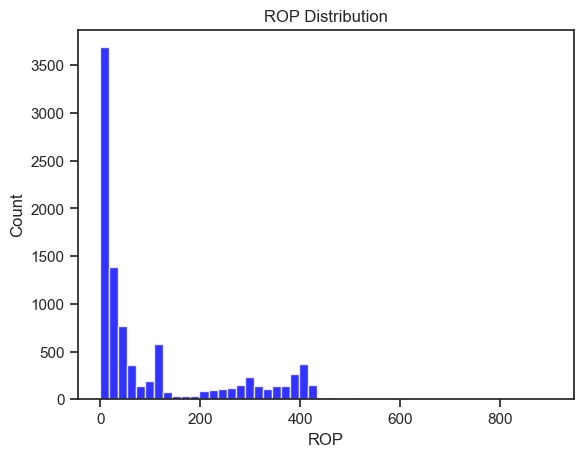

In [44]:
# Visualize the distribution of the Rate of Penetration (ROP)
sns.distplot(rawdata['ROP'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('ROP Distribution')

Text(0.5, 1.0, 'WOB Distribution')

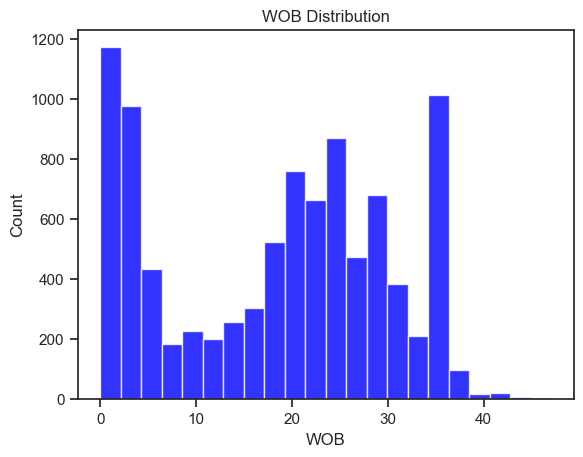

In [45]:
# Visualize the distribution of the Weight on Bit (WOB)
sns.distplot(rawdata['WOB'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('WOB Distribution')

Text(0.5, 1.0, 'Flow Rate Distribution')

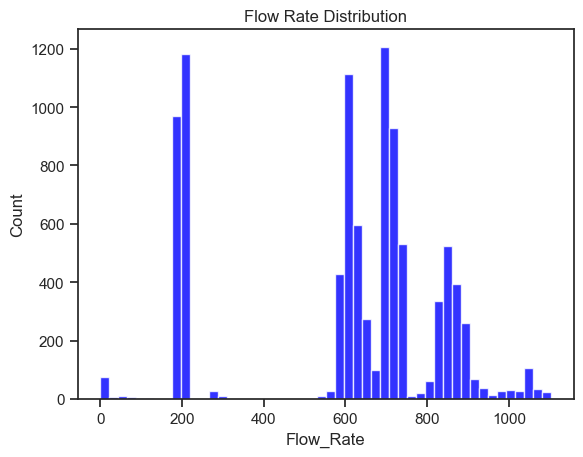

In [46]:
# Visualize the distribution of the Flow Rate
sns.distplot(rawdata['Flow_Rate'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Flow Rate Distribution')

Text(0.5, 1.0, 'Rotary Speed Distribution')

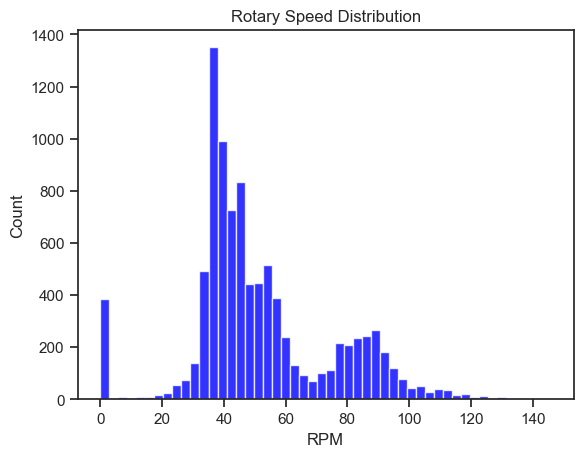

In [47]:
# Visualize the distribution of the Rotary Speed (RPM)
sns.distplot(rawdata['RPM'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Rotary Speed Distribution')

Text(0.5, 1.0, 'Torque Distribution')

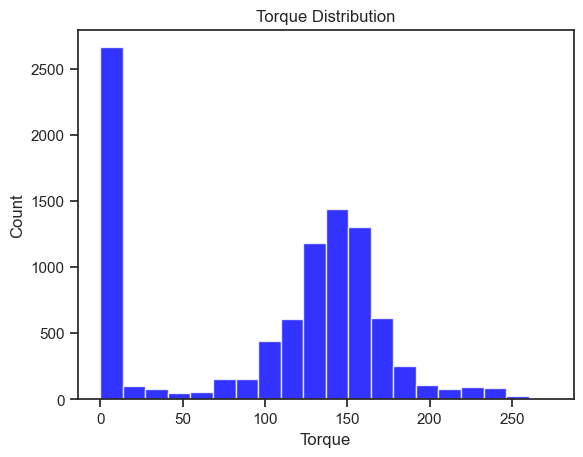

In [48]:
# Visualize the distribution of Torque
sns.distplot(rawdata['Torque'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Torque Distribution')

Text(0.5, 1.0, 'Mud Weight Distribution')

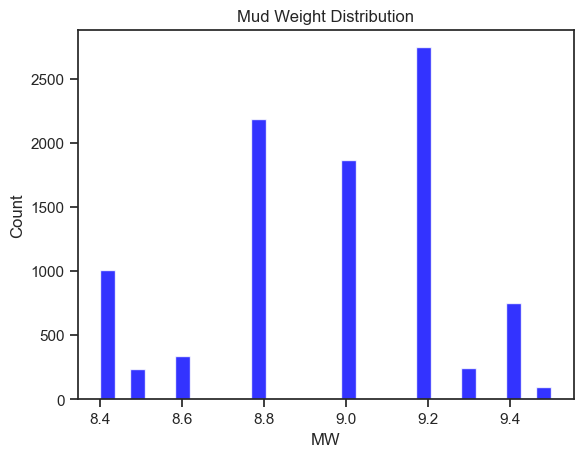

In [49]:
# Visualize the distribution of Mud Weight
sns.distplot(rawdata['MW'], kde=False, 
             color="blue", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title('Mud Weight Distribution')

In [50]:
rawdata.head(2)

DEPTH    ROP  WOB  Flow_Rate    RPM  Torque   MW Lithology Well_ID
2  87.23  18.58  0.0    1102.87  61.54    9.01  8.6  Alluvium   58-32
3  88.26  38.29  0.0    1101.04  60.23    8.97  8.6  Alluvium   58-32

### 3.2: Visualization of Features Distribution according to Lithology Hardness Type

In [51]:
# Select only numeric columns for the mean calculation
numeric_data = rawdata.select_dtypes(include=['float64'])

# Now group by 'Hardness_Type' and determine the mean of each numeric feature
df_p11 = numeric_data.groupby(rawdata['Lithology']).mean()

# Reset the index to turn 'Hardness_Type' back into a column
df_p11 = df_p11.reset_index()

# Display the first few rows to verify results
df_p11.head()

Lithology        DEPTH         ROP        WOB   Flow_Rate        RPM  \
0  Alluvium  1790.406941  183.147687  10.646107  554.424659  58.705162   
1  Plutonic  6392.505944   12.328071  31.362824  618.963561  41.962352   
2  Rhyolite  4254.048409   14.932162  23.952141  677.378187  43.521056   

       Torque        MW  
0   69.830779  9.009346  
1  142.489078  8.662842  
2  136.367520  9.197273

In [52]:
rawdata.dtypes

DEPTH        float64
ROP          float64
WOB          float64
Flow_Rate    float64
RPM          float64
Torque       float64
MW           float64
Lithology     object
Well_ID       object
dtype: object

Text(0.5, 1.0, 'Averge ROP according to Lithology')

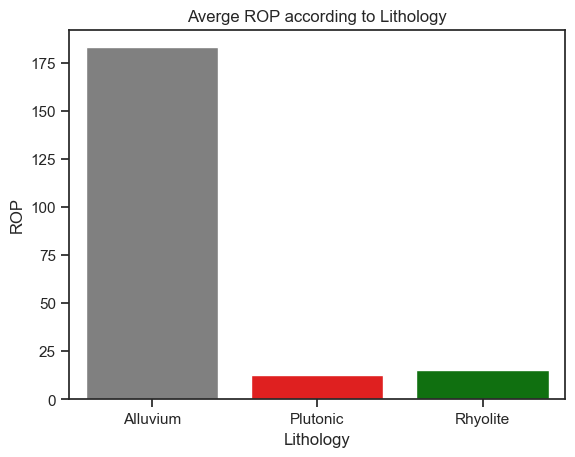

In [53]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["ROP"])
plt.title('Averge ROP according to Lithology')

From the above plot, the rate of penetration is averagely 46 for the hard formation type and averagely 108 for the medium formation. This is logical as drilling rate increases in softer formations when other controllable driling parameters are kept constant.

Text(0.5, 1.0, 'Averge Torque according to Lithology')

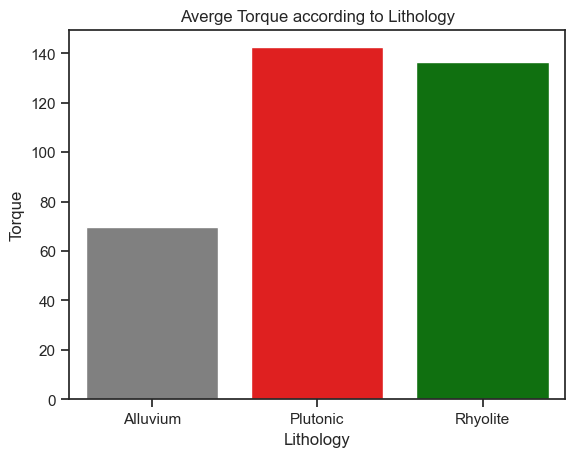

In [54]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["Torque"])
plt.title('Averge Torque according to Lithology')

From the above plot, there are higher torque values for the hard formation and relatively lower values for the soft formation. It is a normal drilling phenomenon to experience higher torque values in hard formations because of the high resistance caused by hard rocks on the drill string.

Text(0.5, 1.0, 'Averge Rotary Speed according to Lithology')

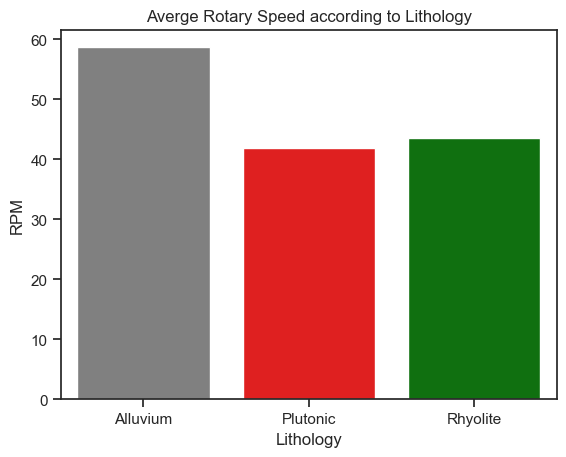

In [55]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["RPM"])
plt.title('Averge Rotary Speed according to Lithology')

Text(0.5, 1.0, 'Averge Flow Rate according to Lithology')

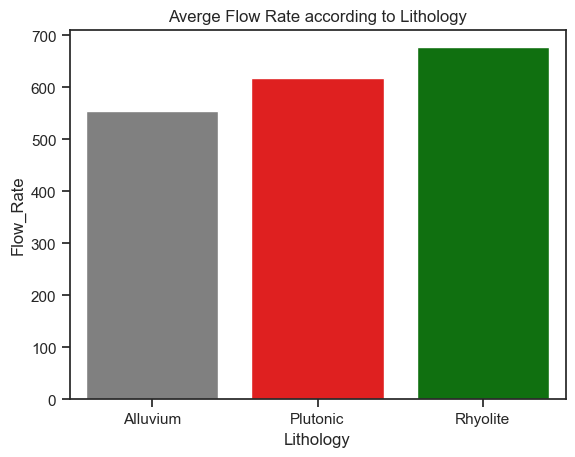

In [56]:
sns.barplot(x=df_p11["Lithology"], y=df_p11["Flow_Rate"])
plt.title('Averge Flow Rate according to Lithology')

Due to the high rate of penetration in medium formations, more cuttings will be generated. Higher flowrate are needed to ennsure the efficient removal of the cuttings from the wellbore to prevent stuck pipe, wellbore instability, increased torque and drag, and reduced drilling efficiency.

### 3.3: Correlation plot (Heatmap) of numerical features

Text(0.5, 1.0, 'Correlation map of Numerical Variables')

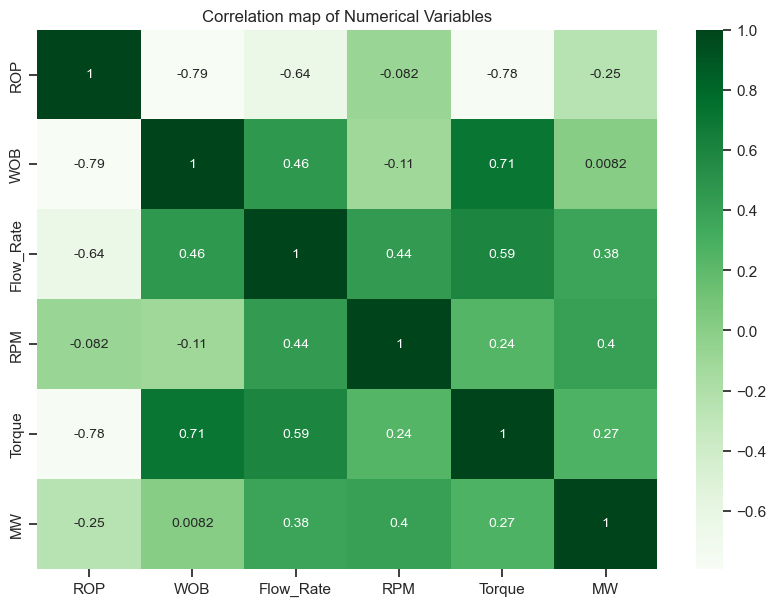

In [57]:
df_feature_num = df_explore[['ROP', 'WOB', 'Flow_Rate','RPM', 'Torque', 'MW']]
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = df_feature_num.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Greens')
plt.title('Correlation map of Numerical Variables')

### 4. Feature Engineering

The objective is to compare feature creation techniques and feature extraction technique and their corresponding impact on the predictive models.

### 4.1: Feature Creation
Feature Creation techniques were employed to transform categorical variables to numerical variables

#### 4.1.1: One Hot Encoding

One-hot encoding is a feature creation technique that converts categorical data into binary. It maps category to a vector that contains 1 or 0 denoting the presence of the feature or not. It produces the number of columns equal to the number of categories.

One-hot encoding is used to convert the Hardness_Type (categorical variable) into a binary (Hardness_M and Hardness_H) for ROP prediction

Reference: Spring 2023 project (http://localhost:8889/notebooks/Downloads/Spring%202023%20Project%201-1-Copy2-1.ipynb)

In [83]:
rawdata.head(2)

DEPTH    ROP  WOB  Flow_Rate    RPM  Torque   MW Lithology Well_ID
2  87.23  18.58  0.0    1102.87  61.54    9.01  8.6  Alluvium   58-32
3  88.26  38.29  0.0    1101.04  60.23    8.97  8.6  Alluvium   58-32

In [85]:
rawdata1 = rawdata.copy()
rawdata1.head(2)

DEPTH    ROP  WOB  Flow_Rate    RPM  Torque   MW Lithology Well_ID
2  87.23  18.58  0.0    1102.87  61.54    9.01  8.6  Alluvium   58-32
3  88.26  38.29  0.0    1101.04  60.23    8.97  8.6  Alluvium   58-32

In [86]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

# Fit and transform the Lithology column
Cat_1hot = cat_encoder.fit_transform(rawdata1[['Lithology']])

# Create a DataFrame from the transformed data
Cat = pd.DataFrame(Cat_1hot, columns=cat_encoder.get_feature_names_out(['Lithology']))

# Ensure the indices match
Cat.index = rawdata1.index

# Concatenate the original DataFrame and the new OneHot encoded DataFrame
rawdata1 = pd.concat([rawdata1, Cat], axis=1)

# Check for missing values in the new DataFrame
missing_values = rawdata1.isnull().sum()
print("Missing values after OneHot encoding and concatenation:")
print(missing_values)

Missing values after OneHot encoding and concatenation:
DEPTH                 0
ROP                   0
WOB                   0
Flow_Rate             0
RPM                   0
Torque                0
MW                    0
Lithology             0
Well_ID               0
Lithology_Alluvium    0
Lithology_Plutonic    0
Lithology_Rhyolite    0
dtype: int64


In [87]:
# Drop the specified columns
rawdata1 = rawdata1.drop(columns=['DEPTH', 'Lithology'])
rawdata1.head(2)

ROP  WOB  Flow_Rate    RPM  Torque   MW Well_ID  Lithology_Alluvium  \
2  18.58  0.0    1102.87  61.54    9.01  8.6   58-32                 1.0   
3  38.29  0.0    1101.04  60.23    8.97  8.6   58-32                 1.0   

   Lithology_Plutonic  Lithology_Rhyolite  
2                 0.0                 0.0  
3                 0.0                 0.0

### Train and Test Split

In [88]:
# Split the data into training and testing sets based on Well_ID
train_data = rawdata1[rawdata1['Well_ID'] == '58-32']
test_data = rawdata1[rawdata1['Well_ID'] == '56-32']

In [89]:
# Drop Well_ID from train and test sets (since it's already used for splitting)
train_data = train_data.drop(columns=['Well_ID'])
test_data = test_data.drop(columns=['Well_ID'])

In [90]:
# Separate predictors and target variable
X_train = train_data.drop(columns=['ROP'])
y_train = train_data['ROP']
X_test = test_data.drop(columns=['ROP'])
y_test = test_data['ROP']

In [91]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax scaling to the numerical features
numerical_cols = ['WOB', 'Flow_Rate', 'RPM', 'Torque', 'MW']
scaler = MinMaxScaler()

In [92]:
# Fit the scaler on the training data and transform both training and test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [93]:
# Convert the scaled data back to DataFrames for easier handling
X_trainOH = pd.DataFrame(X_train, columns=X_train.columns)
X_validOH = pd.DataFrame(X_test, columns=X_test.columns)
y_trainOH = y_train.reset_index(drop=True)
y_validOH = y_test.reset_index(drop=True)

In [80]:
# Check for missing values in the training predictors
missing_values_X_trainOH = X_trainOH.isnull().sum()
print("Missing values in X_trainOH:")
print(missing_values_X_trainOH)
print("\nTotal missing values in X_trainOH:", missing_values_X_trainOH.sum())

# Check for missing values in the validation/test predictors
missing_values_X_validOH = X_validOH.isnull().sum()
print("Missing values in X_validOH:")
print(missing_values_X_validOH)
print("\nTotal missing values in X_validOH:", missing_values_X_validOH.sum())

# Check for missing values in the training target
missing_values_y_trainOH = y_trainOH.isnull().sum()
print("Missing values in y_trainOH:")
print(missing_values_y_trainOH)
print("\nTotal missing values in y_trainOH:", missing_values_y_trainOH.sum())

# Check for missing values in the validation/test target
missing_values_y_validOH = y_validOH.isnull().sum()
print("Missing values in y_validOH:")
print(missing_values_y_validOH)
print("\nTotal missing values in y_validOH:", missing_values_y_validOH.sum())


Missing values in X_trainOH:
WOB          0
Flow_Rate    0
RPM          0
Torque       0
MW           0
A            0
R            0
P            0
dtype: int64

Total missing values in X_trainOH: 0
Missing values in X_validOH:
WOB           0
Flow_Rate     0
RPM           0
Torque        0
MW            0
A            17
R            17
P            17
dtype: int64

Total missing values in X_validOH: 51
Missing values in y_trainOH:
0

Total missing values in y_trainOH: 0
Missing values in y_validOH:
0

Total missing values in y_validOH: 0


In [84]:
# Filter the DataFrame for Well_ID = 56-32
rawdata_56_32 = rawdata1[rawdata1['Well_ID'] == '56-32']

# Check for missing values in the filtered DataFrame
missing_values_56_32 = rawdata_56_32.isnull().sum()

print("Missing values in rawdata1 for Well_ID = 56-32:")
print(missing_values_56_32)
print("\nTotal missing values in rawdata1 for Well_ID = 56-32:", missing_values_56_32.sum())

Missing values in rawdata1 for Well_ID = 56-32:
ROP           0
WOB           0
Flow_Rate     0
RPM           0
Torque        0
MW            0
Well_ID       0
A            17
R            17
P            17
dtype: int64

Total missing values in rawdata1 for Well_ID = 56-32: 51


In [94]:
# Display the first few rows of the scaled training data
print(X_trainOH.head())
print(y_trainOH.head())

        WOB  Flow_Rate       RPM    Torque        MW  Lithology_Alluvium  \
2  0.000000   0.999447  0.421420  0.032918  0.181818                 1.0   
3  0.000000   0.997789  0.412449  0.032772  0.181818                 1.0   
4  0.000000   0.999076  0.422858  0.032772  0.181818                 1.0   
5  0.000000   0.998523  0.424502  0.032772  0.181818                 1.0   
6  0.016153   0.998713  0.425050  0.032772  0.181818                 1.0   

   Lithology_Plutonic  Lithology_Rhyolite  
2                 0.0                 0.0  
3                 0.0                 0.0  
4                 0.0                 0.0  
5                 0.0                 0.0  
6                 0.0                 0.0  
0     18.58
1     38.29
2    394.38
3    413.16
4    450.72
Name: ROP, dtype: float64


In [95]:
# Display the first few rows of the scaled testing data
print(X_validOH.head())
print(y_validOH.head())

           WOB  Flow_Rate       RPM    Torque        MW  Lithology_Alluvium  \
7311  0.001090   0.077629  0.066705  0.001632  0.363636                 1.0   
7312  0.030631   0.185957  0.201192  0.002665  0.363636                 1.0   
7313  0.028162   0.185707  0.201192  0.002616  0.363636                 1.0   
7314  0.006111   0.185800  0.214721  0.002624  0.363636                 1.0   
7315  0.000879   0.185702  0.254886  0.002686  0.363636                 1.0   

      Lithology_Plutonic  Lithology_Rhyolite  
7311                 0.0                 0.0  
7312                 0.0                 0.0  
7313                 0.0                 0.0  
7314                 0.0                 0.0  
7315                 0.0                 0.0  
0     0.004745
1     2.614706
2    45.028500
3    69.449750
4    69.393793
Name: ROP, dtype: float64


In [96]:
# Fit the baseline model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# Define the function to return the MAPE values
import numpy as np

def MAPE(Y_actual, Y_Predicted):
    Y_actual = np.array(Y_actual)
    Y_Predicted = np.array(Y_Predicted)
    
    # Exclude cases where Y_actual is zero
    non_zero_mask = Y_actual != 0
    Y_actual_non_zero = Y_actual[non_zero_mask]
    Y_Predicted_non_zero = Y_Predicted[non_zero_mask]
    
    # Calculate MAPE for non-zero actual values
    mape = np.mean(np.abs((Y_actual_non_zero - Y_Predicted_non_zero) / Y_actual_non_zero)) * 100
    
    return mape

In [97]:
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_trainOH, y_trainOH)

y_pred_reg = reg.predict(X_validOH)
print("MSE:", mean_squared_error(y_validOH,y_pred_reg))
print("R2:", r2_score(y_validOH,y_pred_reg))
print("MAPE:", MAPE(y_validOH,y_pred_reg))
print("MAE:", mean_absolute_error(y_validOH,y_pred_reg))

MSE: 64449.775783998506
R2: -7.010878382680177
MAPE: 980.4729725632607
MAE: 240.0904789072937


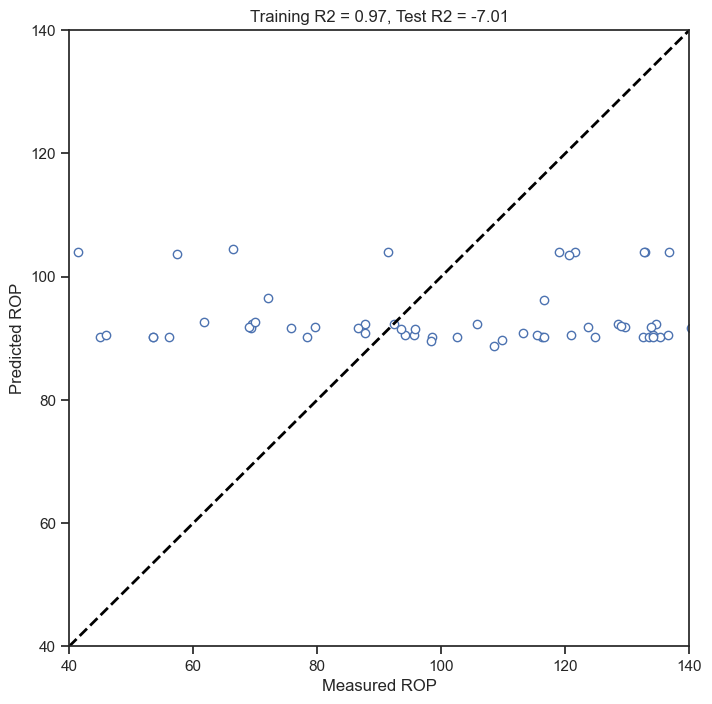

Training Metrics:
MSE: 129.27477900444424
R2: 0.9705463120195658
MAPE: 9.81955350907066
MAE: 3.9123351631477923
RMSE: 11.369906728045056

Testing Metrics:
MSE: 64409.21482075765
R2: -7.005836798909648
MAPE: 1109.7515341112296
MAE: 240.07126118103707
RMSE: 253.78970589989981


In [99]:
# Train the model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Predict on both training and validation set
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

# Calculate metrics for the training set
training_MSE = mean_squared_error(y_train, y_pred_train)
training_R2 = r2_score(y_train, y_pred_train)
training_MAPE = MAPE(y_train, y_pred_train)
training_MAE = mean_absolute_error(y_train, y_pred_train)
training_RMSE = np.sqrt(training_MSE)

# Calculate metrics for the testing set
test_MSE = mean_squared_error(y_test, y_pred_test)
test_R2 = r2_score(y_test, y_pred_test)
test_MAPE = MAPE(y_test, y_pred_test)
test_MAE = mean_absolute_error(y_test, y_pred_test)
test_RMSE = np.sqrt(test_MSE)

# Plotting Predicted vs Actual for the testing set
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test, y_pred_test, c='w', edgecolor='b')
ax.plot([40, 140], [40, 140], color='black', linewidth=2, linestyle='--')
ax.set(xlim=[40, 140], ylim=[40, 140], ylabel='Predicted ROP', xlabel='Measured ROP')
ax.set_title(f'Training R2 = {training_R2:.2f}, Test R2 = {test_R2:.2f}')
plt.show()

# Printing training metrics
print("Training Metrics:")
print("MSE:", training_MSE)
print("R2:", training_R2)
print("MAPE:", training_MAPE)
print("MAE:", training_MAE)
print("RMSE:", training_RMSE)

# Printing testing metrics
print("\nTesting Metrics:")
print("MSE:", test_MSE)
print("R2:", test_R2)
print("MAPE:", test_MAPE)
print("MAE:", test_MAE)
print("RMSE:", test_RMSE)

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify the numerical columns to be scaled
numerical_cols = ['WOB', 'Flow_Rate', 'RPM', 'Torque', 'MW']

# Apply standard scaling to the numerical features
scaler = MinMaxScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

In [133]:
from sklearn.preprocessing import MinMaxScaler

#Scale data using MinMax
scaler = MinMaxScaler() 
#Fit the whole set of data in the scaler and scale it 
mm_scaler = scaler.fit(rawdata1)

#Transform the train data to scaled 
x_Onehot = mm_scaler.transform(rawdata1)
x_Onehot = pd.DataFrame(x_Onehot, columns=rawdata1.columns)
x_Onehot.head()

WOB  Flow_Rate    RPM  Torque     MW
0 0.0000     0.9994 0.4214  0.0329 0.1818
1 0.0000     0.9978 0.4124  0.0328 0.1818
2 0.0000     0.9991 0.4229  0.0328 0.1818
3 0.0000     0.9985 0.4245  0.0328 0.1818
4 0.0162     0.9987 0.4250  0.0328 0.1818

In [134]:
# concatenating values with dataframe
x_Onehot[['Hardness_M']] = Cat[['M']]
x_Onehot[['Hardness_H']] = Cat[['H']]
x_Onehot[['Well_ID']] = rawdata[['Well_ID']]
x_Onehot.head()

WOB  Flow_Rate    RPM  Torque     MW  Hardness_M  Hardness_H Well_ID
0 0.0000     0.9994 0.4214  0.0329 0.1818      0.0000      1.0000     NaN
1 0.0000     0.9978 0.4124  0.0328 0.1818      0.0000      1.0000     NaN
2 0.0000     0.9991 0.4229  0.0328 0.1818      0.0000      1.0000   58-32
3 0.0000     0.9985 0.4245  0.0328 0.1818      0.0000      1.0000   58-32
4 0.0162     0.9987 0.4250  0.0328 0.1818      0.0000      1.0000   58-32

In [129]:
x_Onehot.to_csv('OneHotEncod.csv', index=False)

In [ ]:
X_trainOH =
X_validOH
y_trainOH
y_validOH